5# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will train your CNN-RNN model.  

You are welcome and encouraged to try out many different architectures and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy!  Before submitting your project, make sure that you clean up:
- the code you write in this notebook.  The notebook should describe how to train a single CNN-RNN architecture, corresponding to your final choice of hyperparameters.  You should structure the notebook so that the reviewer can replicate your results by running the code in this notebook.  
- the output of the code cell in **Step 2**.  The output should show the output obtained when training the model from scratch.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Training Setup
- [Step 2](#step2): Train your Model
- [Step 3](#step3): (Optional) Validate your Model

<a id='step1'></a>
## Step 1: Training Setup

In this step of the notebook, you will customize the training of your CNN-RNN model by specifying hyperparameters and setting other options that are important to the training procedure.  The values you set now will be used when training your model in **Step 2** below.

You should only amend blocks of code that are preceded by a `TODO` statement.  **Any code blocks that are not preceded by a `TODO` statement should not be modified**.

### Task #1

Begin by setting the following variables:
- `batch_size` - the batch size of each training batch.  It is the number of image-caption pairs used to amend the model weights in each training step. 
- `vocab_threshold` - the minimum word count threshold.  Note that a larger threshold will result in a smaller vocabulary, whereas a smaller threshold will include rarer words and result in a larger vocabulary.  
- `vocab_from_file` - a Boolean that decides whether to load the vocabulary from file. 
- `embed_size` - the dimensionality of the image and word embeddings.  
- `hidden_size` - the number of features in the hidden state of the RNN decoder.  
- `num_epochs` - the number of epochs to train the model.  We recommend that you set `num_epochs=3`, but feel free to increase or decrease this number as you wish.  [This paper](https://arxiv.org/pdf/1502.03044.pdf) trained a captioning model on a single state-of-the-art GPU for 3 days, but you'll soon see that you can get reasonable results in a matter of a few hours!  (_But of course, if you want your model to compete with current research, you will have to train for much longer._)
- `save_every` - determines how often to save the model weights.  We recommend that you set `save_every=1`, to save the model weights after each epoch.  This way, after the `i`th epoch, the encoder and decoder weights will be saved in the `models/` folder as `encoder-i.pkl` and `decoder-i.pkl`, respectively.
- `print_every` - determines how often to print the batch loss to the Jupyter notebook while training.  Note that you **will not** observe a monotonic decrease in the loss function while training - this is perfectly fine and completely expected!  You are encouraged to keep this at its default value of `100` to avoid clogging the notebook, but feel free to change it.
- `log_file` - the name of the text file containing - for every step - how the loss and perplexity evolved during training.

If you're not sure where to begin to set some of the values above, you can peruse [this paper](https://arxiv.org/pdf/1502.03044.pdf) and [this paper](https://arxiv.org/pdf/1411.4555.pdf) for useful guidance!  **To avoid spending too long on this notebook**, you are encouraged to consult these suggested research papers to obtain a strong initial guess for which hyperparameters are likely to work best.  Then, train a single model, and proceed to the next notebook (**3_Inference.ipynb**).  If you are unhappy with your performance, you can return to this notebook to tweak the hyperparameters (and/or the architecture in **model.py**) and re-train your model.

### Question 1

**Question:** Describe your CNN-RNN architecture in detail.  With this architecture in mind, how did you select the values of the variables in Task 1?  If you consulted a research paper detailing a successful implementation of an image captioning model, please provide the reference.

**Answer:** The encoder is a pre-trained ResNet-50 architecture. The resulting image feature vector is then passed through a linear layer so that is has the same size as the word embeddings.The decoder RNN consists of an embedding layer, an LSTM with one hidden layer and a finaly fully connected layer that maps the hidden state output to the vocab size. The choice of the network and the parameters was inspired by paper referenced above (arxiv:1411.4555).


### (Optional) Task #2

Note that we have provided a recommended image transform `transform_train` for pre-processing the training images, but you are welcome (and encouraged!) to modify it as you wish.  When modifying this transform, keep in mind that:
- the images in the dataset have varying heights and widths, and 
- if using a pre-trained model, you must perform the corresponding appropriate normalization.

### Question 2

**Question:** How did you select the transform in `transform_train`?  If you left the transform at its provided value, why do you think that it is a good choice for your CNN architecture?

**Answer:** I kept the `transform_train` transformation as it was provided. The resizing to 224 x 224 is required for the pre-trained network and also the normalization has to be adapted to the dataset that was used for pre-training.

### Task #3

Next, you will specify a Python list containing the learnable parameters of the model.  For instance, if you decide to make all weights in the decoder trainable, but only want to train the weights in the embedding layer of the encoder, then you should set `params` to something like:
```
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
```

### Question 3

**Question:** How did you select the trainable parameters of your architecture?  Why do you think this is a good choice?

**Answer:** I used the suggested trainable parameters. The encoder is pretrained on similar images as the ones that we want to use for feature extraction. Only the last fully connected layer that generates the embeddings is trained. For the decoder we need to train all parameters because we did not use any pretrained network.

### Task #4

Finally, you will select an [optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer).

### Question 4

**Question:** How did you select the optimizer used to train your model?

**Answer:** The paper suggests using a SGD for optimization. I did not want to tweak the learning rate so I decided to start with an ADAM optimizer which is regarded as a good first choice because through adaptive learning rates it avoids beeing stuck in local minima.

## Installation of COCO API for Windows

In [28]:
#%cd ..

In [29]:
#! pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

In [30]:
#%cd cocoapi/PythonAPI/

## Installation for COCO API under Linux

In [ ]:
#%cd /opt
#! git clone https://github.com/cocodataset/cocoapi.git 

In [ ]:
#%cd opt/cocoapi/PythonAPI  
#! make  
#%cd ..

## Downloading and extracting the data
Beware that downloading and extracting the dataset requires a lot of time

In [ ]:
#!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
#!unzip annotations_trainval2014.zip

In [ ]:
#mkdir images

In [ ]:
#!wget http://images.cocodataset.org/zips/train2014.zip

In [ ]:
#!unzip train2014.zip -d images

In [ ]:
#!wget http://images.cocodataset.org/zips/val2014.zip

In [ ]:
#!unzip val2014.zip -d images

## Setup for Google Colab
not really recommended, because downloading and extracting the dataset takes a long time!

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# % cd "/content/drive/My Drive/Colab Notebooks/ud-image-captioning"

## Setup for training the model

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
#sys.path.append('/opt/cocoapi/PythonAPI')
sys.path.append('G:/cocoapi/PythonAPI')
from pycocotools.coco import COCO
#from data_loader import get_loader
from data_loader_eval import get_loader
from model import EncoderCNN, DecoderRNN
import math
import torch.utils.data as data
import numpy as np
import os
import requests
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
%load_ext autoreload
%autoreload 2

In [2]:
# load missing library
#nltk.download('punkt')

In [3]:
torch.cuda.is_available()

True

In [4]:
## TODO #1: Select appropriate values for the Python variables below.
batch_size = 128        # batch size
vocab_threshold = 5        # minimum word count threshold
vocab_from_file = True  # if True, load existing vocab file
embed_size = 512           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 5            # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity


In [5]:
# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Add validation tranforms
transform_val = transforms.Compose([ 
    #transforms.Resize(224),                          # smaller edge of image resized to 256
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])


In [6]:
from data_loader_eval import get_loader

In [7]:
# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=1.16s)
creating index...


  0%|                                                                           | 623/414113 [00:00<01:06, 6184.87it/s]

index created!
Obtaining caption lengths...


100%|████████████████████████████████████████████████████████████████████████| 414113/414113 [00:41<00:00, 9892.92it/s]


In [8]:
# Build validation data loader
val_data_loader = get_loader(transform=transform_val, 
                         mode='val')

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [9]:
# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

In [10]:
# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

<a id='step2'></a>
## Step 2: Train your Model

Once you have executed the code cell in **Step 1**, the training procedure below should run without issue.  

It is completely fine to leave the code cell below as-is without modifications to train your model.  However, if you would like to modify the code used to train the model below, you must ensure that your changes are easily parsed by your reviewer.  In other words, make sure to provide appropriate comments to describe how your code works!  

You may find it useful to load saved weights to resume training.  In that case, note the names of the files containing the encoder and decoder weights that you'd like to load (`encoder_file` and `decoder_file`).  Then you can load the weights by using the lines below:

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

While trying out parameters, make sure to take extensive notes and record the settings that you used in your various training runs.  In particular, you don't want to encounter a situation where you've trained a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters

To figure out how well your model is doing, you can look at how the training loss and perplexity evolve during training - and for the purposes of this project, you are encouraged to amend the hyperparameters based on this information.  

However, this will not tell you if your model is overfitting to the training data, and, unfortunately, overfitting is a problem that is commonly encountered when training image captioning models.  

For this project, you need not worry about overfitting. **This project does not have strict requirements regarding the performance of your model**, and you just need to demonstrate that your model has learned **_something_** when you generate captions on the test data.  For now, we strongly encourage you to train your model for the suggested 3 epochs without worrying about performance; then, you should immediately transition to the next notebook in the sequence (**3_Inference.ipynb**) to see how your model performs on the test data.  If your model needs to be changed, you can come back to this notebook, amend hyperparameters (if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you can read about some approaches to minimizing overfitting in section 4.3.1 of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636).  In the next (optional) step of this notebook, we provide some guidance for assessing the performance on the validation dataset.

In [11]:
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('models', 'encoder-5.pkl')))
decoder.load_state_dict(torch.load(os.path.join('models', 'decoder-5.pkl')))

<All keys matched successfully>

In [12]:
# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()
#response = requests.request("GET", 
#                            "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
#                           headers={"Metadata-Flavor":"Google"})

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            #requests.request("POST", 
             #                "https://nebula.udacity.com/api/v1/remote/keep-alive", 
              #               headers={'Authorization': "STAR " + response.text})
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder_5-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder_5-%d.pkl' % epoch))

        #print ('Evaluation using BLEU: ')

# Close the training log file.
f.close()

torch.Size([128, 15, 512])
Epoch [1/5], Step [1/3236], Loss: 1.9177, Perplexity: 6.8052torch.Size([128, 17, 512])
Epoch [1/5], Step [2/3236], Loss: 2.1432, Perplexity: 8.5265torch.Size([128, 13, 512])
Epoch [1/5], Step [3/3236], Loss: 1.8701, Perplexity: 6.4888torch.Size([128, 12, 512])
Epoch [1/5], Step [4/3236], Loss: 1.9376, Perplexity: 6.9422torch.Size([128, 12, 512])
Epoch [1/5], Step [5/3236], Loss: 1.8737, Perplexity: 6.5124torch.Size([128, 14, 512])
Epoch [1/5], Step [6/3236], Loss: 1.8985, Perplexity: 6.6759torch.Size([128, 12, 512])
Epoch [1/5], Step [7/3236], Loss: 1.7661, Perplexity: 5.8479torch.Size([128, 12, 512])
Epoch [1/5], Step [8/3236], Loss: 1.7876, Perplexity: 5.9753torch.Size([128, 13, 512])
Epoch [1/5], Step [9/3236], Loss: 1.7183, Perplexity: 5.5753torch.Size([128, 11, 512])
Epoch [1/5], Step [10/3236], Loss: 1.8319, Perplexity: 6.2457torch.Size([128, 12, 512])
Epoch [1/5], Step [11/3236], Loss: 1.7398, Perplexity: 5.6964torch.Size([128, 12, 512])
Epoch [1/5], S

Epoch [1/5], Step [94/3236], Loss: 1.7971, Perplexity: 6.0324torch.Size([128, 13, 512])
Epoch [1/5], Step [95/3236], Loss: 1.6453, Perplexity: 5.1828torch.Size([128, 14, 512])
Epoch [1/5], Step [96/3236], Loss: 1.8853, Perplexity: 6.5882torch.Size([128, 11, 512])
Epoch [1/5], Step [97/3236], Loss: 1.8578, Perplexity: 6.4099torch.Size([128, 12, 512])
Epoch [1/5], Step [98/3236], Loss: 1.7844, Perplexity: 5.9558torch.Size([128, 11, 512])
Epoch [1/5], Step [99/3236], Loss: 1.8349, Perplexity: 6.2647torch.Size([128, 12, 512])
Epoch [1/5], Step [100/3236], Loss: 1.8124, Perplexity: 6.1250
torch.Size([128, 12, 512])
Epoch [1/5], Step [101/3236], Loss: 1.8260, Perplexity: 6.2093torch.Size([128, 12, 512])
Epoch [1/5], Step [102/3236], Loss: 1.8978, Perplexity: 6.6715torch.Size([128, 12, 512])
Epoch [1/5], Step [103/3236], Loss: 1.9181, Perplexity: 6.8079torch.Size([128, 12, 512])
Epoch [1/5], Step [104/3236], Loss: 1.7834, Perplexity: 5.9503torch.Size([128, 19, 512])
Epoch [1/5], Step [105/323

Epoch [1/5], Step [278/3236], Loss: 2.2295, Perplexity: 9.2953torch.Size([128, 12, 512])
Epoch [1/5], Step [279/3236], Loss: 1.8349, Perplexity: 6.2647torch.Size([128, 12, 512])
Epoch [1/5], Step [280/3236], Loss: 1.9367, Perplexity: 6.9355torch.Size([128, 14, 512])
Epoch [1/5], Step [281/3236], Loss: 1.8686, Perplexity: 6.4792torch.Size([128, 11, 512])
Epoch [1/5], Step [282/3236], Loss: 1.8949, Perplexity: 6.6517torch.Size([128, 13, 512])
Epoch [1/5], Step [283/3236], Loss: 1.8759, Perplexity: 6.5268torch.Size([128, 12, 512])
Epoch [1/5], Step [284/3236], Loss: 1.7486, Perplexity: 5.7466torch.Size([128, 18, 512])
Epoch [1/5], Step [285/3236], Loss: 2.2986, Perplexity: 9.9600torch.Size([128, 12, 512])
Epoch [1/5], Step [286/3236], Loss: 1.8337, Perplexity: 6.2570torch.Size([128, 13, 512])
Epoch [1/5], Step [287/3236], Loss: 1.8444, Perplexity: 6.3240torch.Size([128, 18, 512])
Epoch [1/5], Step [288/3236], Loss: 2.1276, Perplexity: 8.3950torch.Size([128, 13, 512])
Epoch [1/5], Step [28

Epoch [1/5], Step [462/3236], Loss: 1.9162, Perplexity: 6.7953torch.Size([128, 10, 512])
Epoch [1/5], Step [463/3236], Loss: 2.0227, Perplexity: 7.5584torch.Size([128, 11, 512])
Epoch [1/5], Step [464/3236], Loss: 1.8874, Perplexity: 6.6019torch.Size([128, 12, 512])
Epoch [1/5], Step [465/3236], Loss: 1.7456, Perplexity: 5.7291torch.Size([128, 11, 512])
Epoch [1/5], Step [466/3236], Loss: 1.8213, Perplexity: 6.1797torch.Size([128, 11, 512])
Epoch [1/5], Step [467/3236], Loss: 1.9044, Perplexity: 6.7156torch.Size([128, 13, 512])
Epoch [1/5], Step [468/3236], Loss: 1.8642, Perplexity: 6.4507torch.Size([128, 12, 512])
Epoch [1/5], Step [469/3236], Loss: 1.8696, Perplexity: 6.4854torch.Size([128, 11, 512])
Epoch [1/5], Step [470/3236], Loss: 1.7816, Perplexity: 5.9396torch.Size([128, 13, 512])
Epoch [1/5], Step [471/3236], Loss: 1.7509, Perplexity: 5.7600torch.Size([128, 11, 512])
Epoch [1/5], Step [472/3236], Loss: 1.7986, Perplexity: 6.0412torch.Size([128, 12, 512])
Epoch [1/5], Step [47

Epoch [1/5], Step [646/3236], Loss: 1.8537, Perplexity: 6.3835torch.Size([128, 12, 512])
Epoch [1/5], Step [647/3236], Loss: 1.8416, Perplexity: 6.3068torch.Size([128, 14, 512])
Epoch [1/5], Step [648/3236], Loss: 1.8100, Perplexity: 6.1102torch.Size([128, 12, 512])
Epoch [1/5], Step [649/3236], Loss: 1.8272, Perplexity: 6.2163torch.Size([128, 21, 512])
Epoch [1/5], Step [650/3236], Loss: 2.5670, Perplexity: 13.0261torch.Size([128, 14, 512])
Epoch [1/5], Step [651/3236], Loss: 1.8800, Perplexity: 6.5534torch.Size([128, 14, 512])
Epoch [1/5], Step [652/3236], Loss: 1.9118, Perplexity: 6.7650torch.Size([128, 22, 512])
Epoch [1/5], Step [653/3236], Loss: 2.5520, Perplexity: 12.8324torch.Size([128, 21, 512])
Epoch [1/5], Step [654/3236], Loss: 2.5342, Perplexity: 12.6065torch.Size([128, 11, 512])
Epoch [1/5], Step [655/3236], Loss: 1.7995, Perplexity: 6.0465torch.Size([128, 13, 512])
Epoch [1/5], Step [656/3236], Loss: 1.7976, Perplexity: 6.0351torch.Size([128, 13, 512])
Epoch [1/5], Step 

Epoch [1/5], Step [738/3236], Loss: 1.7936, Perplexity: 6.0108torch.Size([128, 14, 512])
Epoch [1/5], Step [739/3236], Loss: 1.8260, Perplexity: 6.2092torch.Size([128, 10, 512])
Epoch [1/5], Step [740/3236], Loss: 2.1050, Perplexity: 8.2070torch.Size([128, 11, 512])
Epoch [1/5], Step [741/3236], Loss: 1.9324, Perplexity: 6.9062torch.Size([128, 12, 512])
Epoch [1/5], Step [742/3236], Loss: 1.9202, Perplexity: 6.8223torch.Size([128, 14, 512])
Epoch [1/5], Step [743/3236], Loss: 1.8139, Perplexity: 6.1341torch.Size([128, 16, 512])
Epoch [1/5], Step [744/3236], Loss: 2.0138, Perplexity: 7.4914torch.Size([128, 12, 512])
Epoch [1/5], Step [745/3236], Loss: 1.9268, Perplexity: 6.8673torch.Size([128, 13, 512])
Epoch [1/5], Step [746/3236], Loss: 1.7482, Perplexity: 5.7441torch.Size([128, 11, 512])
Epoch [1/5], Step [747/3236], Loss: 1.9404, Perplexity: 6.9614torch.Size([128, 12, 512])
Epoch [1/5], Step [748/3236], Loss: 1.8096, Perplexity: 6.1081torch.Size([128, 12, 512])
Epoch [1/5], Step [74

Epoch [1/5], Step [922/3236], Loss: 2.1920, Perplexity: 8.9531torch.Size([128, 11, 512])
Epoch [1/5], Step [923/3236], Loss: 1.7599, Perplexity: 5.8120torch.Size([128, 11, 512])
Epoch [1/5], Step [924/3236], Loss: 1.8364, Perplexity: 6.2738torch.Size([128, 14, 512])
Epoch [1/5], Step [925/3236], Loss: 1.9347, Perplexity: 6.9223torch.Size([128, 11, 512])
Epoch [1/5], Step [926/3236], Loss: 1.8868, Perplexity: 6.5983torch.Size([128, 13, 512])
Epoch [1/5], Step [927/3236], Loss: 1.8235, Perplexity: 6.1938torch.Size([128, 13, 512])
Epoch [1/5], Step [928/3236], Loss: 1.9415, Perplexity: 6.9695torch.Size([128, 18, 512])
Epoch [1/5], Step [929/3236], Loss: 2.2789, Perplexity: 9.7657torch.Size([128, 11, 512])
Epoch [1/5], Step [930/3236], Loss: 1.8539, Perplexity: 6.3849torch.Size([128, 14, 512])
Epoch [1/5], Step [931/3236], Loss: 2.0112, Perplexity: 7.4725torch.Size([128, 12, 512])
Epoch [1/5], Step [932/3236], Loss: 1.8026, Perplexity: 6.0654torch.Size([128, 11, 512])
Epoch [1/5], Step [93

Epoch [1/5], Step [1014/3236], Loss: 1.7575, Perplexity: 5.7979torch.Size([128, 9, 512])
Epoch [1/5], Step [1015/3236], Loss: 2.1607, Perplexity: 8.6768torch.Size([128, 11, 512])
Epoch [1/5], Step [1016/3236], Loss: 1.8411, Perplexity: 6.3032torch.Size([128, 12, 512])
Epoch [1/5], Step [1017/3236], Loss: 1.9746, Perplexity: 7.2037torch.Size([128, 14, 512])
Epoch [1/5], Step [1018/3236], Loss: 1.8838, Perplexity: 6.5786torch.Size([128, 11, 512])
Epoch [1/5], Step [1019/3236], Loss: 1.7663, Perplexity: 5.8489torch.Size([128, 19, 512])
Epoch [1/5], Step [1020/3236], Loss: 2.3300, Perplexity: 10.2778torch.Size([128, 15, 512])
Epoch [1/5], Step [1021/3236], Loss: 1.9759, Perplexity: 7.2128torch.Size([128, 16, 512])
Epoch [1/5], Step [1022/3236], Loss: 2.0743, Perplexity: 7.9587torch.Size([128, 15, 512])
Epoch [1/5], Step [1023/3236], Loss: 1.9721, Perplexity: 7.1859torch.Size([128, 12, 512])
Epoch [1/5], Step [1024/3236], Loss: 1.8850, Perplexity: 6.5865torch.Size([128, 11, 512])
Epoch [1/5

Epoch [1/5], Step [1196/3236], Loss: 2.5421, Perplexity: 12.7058torch.Size([128, 27, 512])
Epoch [1/5], Step [1197/3236], Loss: 2.9759, Perplexity: 19.6066torch.Size([128, 11, 512])
Epoch [1/5], Step [1198/3236], Loss: 1.7938, Perplexity: 6.0125torch.Size([128, 11, 512])
Epoch [1/5], Step [1199/3236], Loss: 1.9190, Perplexity: 6.8138torch.Size([128, 14, 512])
Epoch [1/5], Step [1200/3236], Loss: 1.7859, Perplexity: 5.9648
torch.Size([128, 11, 512])
Epoch [1/5], Step [1201/3236], Loss: 1.8420, Perplexity: 6.3089torch.Size([128, 15, 512])
Epoch [1/5], Step [1202/3236], Loss: 1.9326, Perplexity: 6.9074torch.Size([128, 11, 512])
Epoch [1/5], Step [1203/3236], Loss: 1.8870, Perplexity: 6.5995torch.Size([128, 18, 512])
Epoch [1/5], Step [1204/3236], Loss: 2.2817, Perplexity: 9.7934torch.Size([128, 15, 512])
Epoch [1/5], Step [1205/3236], Loss: 1.9125, Perplexity: 6.7699torch.Size([128, 10, 512])
Epoch [1/5], Step [1206/3236], Loss: 2.0877, Perplexity: 8.0660torch.Size([128, 16, 512])
Epoch [

Epoch [1/5], Step [1287/3236], Loss: 2.5440, Perplexity: 12.7301torch.Size([128, 19, 512])
Epoch [1/5], Step [1288/3236], Loss: 2.4238, Perplexity: 11.2891torch.Size([128, 13, 512])
Epoch [1/5], Step [1289/3236], Loss: 1.8573, Perplexity: 6.4066torch.Size([128, 16, 512])
Epoch [1/5], Step [1290/3236], Loss: 2.0040, Perplexity: 7.4189torch.Size([128, 13, 512])
Epoch [1/5], Step [1291/3236], Loss: 1.7863, Perplexity: 5.9674torch.Size([128, 14, 512])
Epoch [1/5], Step [1292/3236], Loss: 1.9223, Perplexity: 6.8364torch.Size([128, 11, 512])
Epoch [1/5], Step [1293/3236], Loss: 1.8430, Perplexity: 6.3153torch.Size([128, 13, 512])
Epoch [1/5], Step [1294/3236], Loss: 1.9396, Perplexity: 6.9561torch.Size([128, 11, 512])
Epoch [1/5], Step [1295/3236], Loss: 1.8798, Perplexity: 6.5525torch.Size([128, 15, 512])
Epoch [1/5], Step [1296/3236], Loss: 1.9184, Perplexity: 6.8098torch.Size([128, 13, 512])
Epoch [1/5], Step [1297/3236], Loss: 1.7554, Perplexity: 5.7857torch.Size([128, 12, 512])
Epoch [1

Epoch [1/5], Step [1378/3236], Loss: 2.1147, Perplexity: 8.2872torch.Size([128, 12, 512])
Epoch [1/5], Step [1379/3236], Loss: 1.9088, Perplexity: 6.7452torch.Size([128, 15, 512])
Epoch [1/5], Step [1380/3236], Loss: 1.9551, Perplexity: 7.0648torch.Size([128, 11, 512])
Epoch [1/5], Step [1381/3236], Loss: 1.7651, Perplexity: 5.8424torch.Size([128, 14, 512])
Epoch [1/5], Step [1382/3236], Loss: 1.8503, Perplexity: 6.3617torch.Size([128, 13, 512])
Epoch [1/5], Step [1383/3236], Loss: 1.7677, Perplexity: 5.8571torch.Size([128, 15, 512])
Epoch [1/5], Step [1384/3236], Loss: 1.8923, Perplexity: 6.6349torch.Size([128, 13, 512])
Epoch [1/5], Step [1385/3236], Loss: 1.8117, Perplexity: 6.1210torch.Size([128, 12, 512])
Epoch [1/5], Step [1386/3236], Loss: 1.7711, Perplexity: 5.8773torch.Size([128, 13, 512])
Epoch [1/5], Step [1387/3236], Loss: 1.8585, Perplexity: 6.4139torch.Size([128, 14, 512])
Epoch [1/5], Step [1388/3236], Loss: 1.7712, Perplexity: 5.8780torch.Size([128, 13, 512])
Epoch [1/5

Epoch [1/5], Step [1469/3236], Loss: 1.8857, Perplexity: 6.5910torch.Size([128, 11, 512])
Epoch [1/5], Step [1470/3236], Loss: 1.8618, Perplexity: 6.4351torch.Size([128, 14, 512])
Epoch [1/5], Step [1471/3236], Loss: 1.8396, Perplexity: 6.2939torch.Size([128, 12, 512])
Epoch [1/5], Step [1472/3236], Loss: 1.7591, Perplexity: 5.8074torch.Size([128, 13, 512])
Epoch [1/5], Step [1473/3236], Loss: 1.9073, Perplexity: 6.7346torch.Size([128, 10, 512])
Epoch [1/5], Step [1474/3236], Loss: 2.1102, Perplexity: 8.2501torch.Size([128, 12, 512])
Epoch [1/5], Step [1475/3236], Loss: 1.8539, Perplexity: 6.3845torch.Size([128, 12, 512])
Epoch [1/5], Step [1476/3236], Loss: 1.7911, Perplexity: 5.9961torch.Size([128, 11, 512])
Epoch [1/5], Step [1477/3236], Loss: 1.8461, Perplexity: 6.3351torch.Size([128, 16, 512])
Epoch [1/5], Step [1478/3236], Loss: 1.9315, Perplexity: 6.8997torch.Size([128, 23, 512])
Epoch [1/5], Step [1479/3236], Loss: 2.6330, Perplexity: 13.9159torch.Size([128, 11, 512])
Epoch [1/

Epoch [1/5], Step [1560/3236], Loss: 1.7825, Perplexity: 5.9445torch.Size([128, 13, 512])
Epoch [1/5], Step [1561/3236], Loss: 1.7843, Perplexity: 5.9554torch.Size([128, 12, 512])
Epoch [1/5], Step [1562/3236], Loss: 1.7837, Perplexity: 5.9516torch.Size([128, 14, 512])
Epoch [1/5], Step [1563/3236], Loss: 1.8904, Perplexity: 6.6222torch.Size([128, 18, 512])
Epoch [1/5], Step [1564/3236], Loss: 2.1761, Perplexity: 8.8123torch.Size([128, 19, 512])
Epoch [1/5], Step [1565/3236], Loss: 2.3081, Perplexity: 10.0548torch.Size([128, 13, 512])
Epoch [1/5], Step [1566/3236], Loss: 1.7510, Perplexity: 5.7604torch.Size([128, 16, 512])
Epoch [1/5], Step [1567/3236], Loss: 2.1109, Perplexity: 8.2559torch.Size([128, 13, 512])
Epoch [1/5], Step [1568/3236], Loss: 1.8367, Perplexity: 6.2757torch.Size([128, 13, 512])
Epoch [1/5], Step [1569/3236], Loss: 1.7252, Perplexity: 5.6138torch.Size([128, 10, 512])
Epoch [1/5], Step [1570/3236], Loss: 2.0955, Perplexity: 8.1295torch.Size([128, 11, 512])
Epoch [1/

Epoch [1/5], Step [1651/3236], Loss: 1.8384, Perplexity: 6.2867torch.Size([128, 11, 512])
Epoch [1/5], Step [1652/3236], Loss: 1.8534, Perplexity: 6.3813torch.Size([128, 12, 512])
Epoch [1/5], Step [1653/3236], Loss: 1.8264, Perplexity: 6.2114torch.Size([128, 14, 512])
Epoch [1/5], Step [1654/3236], Loss: 1.7832, Perplexity: 5.9488torch.Size([128, 11, 512])
Epoch [1/5], Step [1655/3236], Loss: 1.8049, Perplexity: 6.0791torch.Size([128, 14, 512])
Epoch [1/5], Step [1656/3236], Loss: 1.8515, Perplexity: 6.3696torch.Size([128, 13, 512])
Epoch [1/5], Step [1657/3236], Loss: 1.7292, Perplexity: 5.6363torch.Size([128, 12, 512])
Epoch [1/5], Step [1658/3236], Loss: 1.8115, Perplexity: 6.1194torch.Size([128, 18, 512])
Epoch [1/5], Step [1659/3236], Loss: 2.2430, Perplexity: 9.4211torch.Size([128, 13, 512])
Epoch [1/5], Step [1660/3236], Loss: 1.6861, Perplexity: 5.3986torch.Size([128, 12, 512])
Epoch [1/5], Step [1661/3236], Loss: 1.8248, Perplexity: 6.2017torch.Size([128, 13, 512])
Epoch [1/5

Epoch [1/5], Step [1742/3236], Loss: 1.8386, Perplexity: 6.2876torch.Size([128, 12, 512])
Epoch [1/5], Step [1743/3236], Loss: 1.8079, Perplexity: 6.0978torch.Size([128, 12, 512])
Epoch [1/5], Step [1744/3236], Loss: 1.6761, Perplexity: 5.3444torch.Size([128, 14, 512])
Epoch [1/5], Step [1745/3236], Loss: 1.8841, Perplexity: 6.5806torch.Size([128, 10, 512])
Epoch [1/5], Step [1746/3236], Loss: 2.1273, Perplexity: 8.3923torch.Size([128, 12, 512])
Epoch [1/5], Step [1747/3236], Loss: 1.7915, Perplexity: 5.9982torch.Size([128, 11, 512])
Epoch [1/5], Step [1748/3236], Loss: 1.9312, Perplexity: 6.8978torch.Size([128, 14, 512])
Epoch [1/5], Step [1749/3236], Loss: 1.8706, Perplexity: 6.4925torch.Size([128, 12, 512])
Epoch [1/5], Step [1750/3236], Loss: 1.8303, Perplexity: 6.2360torch.Size([128, 21, 512])
Epoch [1/5], Step [1751/3236], Loss: 2.4997, Perplexity: 12.1789torch.Size([128, 13, 512])
Epoch [1/5], Step [1752/3236], Loss: 1.8691, Perplexity: 6.4823torch.Size([128, 15, 512])
Epoch [1/

Epoch [1/5], Step [1833/3236], Loss: 1.7289, Perplexity: 5.6342torch.Size([128, 15, 512])
Epoch [1/5], Step [1834/3236], Loss: 1.9065, Perplexity: 6.7297torch.Size([128, 11, 512])
Epoch [1/5], Step [1835/3236], Loss: 1.9185, Perplexity: 6.8105torch.Size([128, 14, 512])
Epoch [1/5], Step [1836/3236], Loss: 1.9059, Perplexity: 6.7252torch.Size([128, 13, 512])
Epoch [1/5], Step [1837/3236], Loss: 1.8668, Perplexity: 6.4674torch.Size([128, 16, 512])
Epoch [1/5], Step [1838/3236], Loss: 2.0411, Perplexity: 7.6989torch.Size([128, 11, 512])
Epoch [1/5], Step [1839/3236], Loss: 1.7565, Perplexity: 5.7918torch.Size([128, 15, 512])
Epoch [1/5], Step [1840/3236], Loss: 1.9471, Perplexity: 7.0084torch.Size([128, 10, 512])
Epoch [1/5], Step [1841/3236], Loss: 2.0972, Perplexity: 8.1436torch.Size([128, 15, 512])
Epoch [1/5], Step [1842/3236], Loss: 1.9478, Perplexity: 7.0133torch.Size([128, 12, 512])
Epoch [1/5], Step [1843/3236], Loss: 1.7731, Perplexity: 5.8888torch.Size([128, 11, 512])
Epoch [1/5

Epoch [1/5], Step [1924/3236], Loss: 1.8549, Perplexity: 6.3913torch.Size([128, 12, 512])
Epoch [1/5], Step [1925/3236], Loss: 1.8962, Perplexity: 6.6605torch.Size([128, 15, 512])
Epoch [1/5], Step [1926/3236], Loss: 1.9517, Perplexity: 7.0409torch.Size([128, 13, 512])
Epoch [1/5], Step [1927/3236], Loss: 1.8616, Perplexity: 6.4338torch.Size([128, 11, 512])
Epoch [1/5], Step [1928/3236], Loss: 1.7815, Perplexity: 5.9386torch.Size([128, 13, 512])
Epoch [1/5], Step [1929/3236], Loss: 1.7432, Perplexity: 5.7154torch.Size([128, 11, 512])
Epoch [1/5], Step [1930/3236], Loss: 1.7624, Perplexity: 5.8266torch.Size([128, 12, 512])
Epoch [1/5], Step [1931/3236], Loss: 1.7155, Perplexity: 5.5596torch.Size([128, 12, 512])
Epoch [1/5], Step [1932/3236], Loss: 1.8688, Perplexity: 6.4804torch.Size([128, 13, 512])
Epoch [1/5], Step [1933/3236], Loss: 1.7910, Perplexity: 5.9952torch.Size([128, 17, 512])
Epoch [1/5], Step [1934/3236], Loss: 2.3131, Perplexity: 10.1059torch.Size([128, 17, 512])
Epoch [1/

Epoch [1/5], Step [2015/3236], Loss: 1.8369, Perplexity: 6.2772torch.Size([128, 11, 512])
Epoch [1/5], Step [2016/3236], Loss: 1.8350, Perplexity: 6.2648torch.Size([128, 15, 512])
Epoch [1/5], Step [2017/3236], Loss: 1.9043, Perplexity: 6.7150torch.Size([128, 12, 512])
Epoch [1/5], Step [2018/3236], Loss: 1.7309, Perplexity: 5.6460torch.Size([128, 13, 512])
Epoch [1/5], Step [2019/3236], Loss: 1.7334, Perplexity: 5.6601torch.Size([128, 14, 512])
Epoch [1/5], Step [2020/3236], Loss: 1.9362, Perplexity: 6.9325torch.Size([128, 14, 512])
Epoch [1/5], Step [2021/3236], Loss: 1.8489, Perplexity: 6.3525torch.Size([128, 13, 512])
Epoch [1/5], Step [2022/3236], Loss: 1.7848, Perplexity: 5.9581torch.Size([128, 13, 512])
Epoch [1/5], Step [2023/3236], Loss: 1.7525, Perplexity: 5.7690torch.Size([128, 14, 512])
Epoch [1/5], Step [2024/3236], Loss: 1.8610, Perplexity: 6.4302torch.Size([128, 15, 512])
Epoch [1/5], Step [2025/3236], Loss: 1.8659, Perplexity: 6.4615torch.Size([128, 21, 512])
Epoch [1/5

Epoch [1/5], Step [2106/3236], Loss: 1.7789, Perplexity: 5.9235torch.Size([128, 13, 512])
Epoch [1/5], Step [2107/3236], Loss: 1.7937, Perplexity: 6.0116torch.Size([128, 11, 512])
Epoch [1/5], Step [2108/3236], Loss: 1.8077, Perplexity: 6.0964torch.Size([128, 9, 512])
Epoch [1/5], Step [2109/3236], Loss: 2.0125, Perplexity: 7.4817torch.Size([128, 17, 512])
Epoch [1/5], Step [2110/3236], Loss: 2.1646, Perplexity: 8.7108torch.Size([128, 12, 512])
Epoch [1/5], Step [2111/3236], Loss: 1.7814, Perplexity: 5.9380torch.Size([128, 14, 512])
Epoch [1/5], Step [2112/3236], Loss: 1.8591, Perplexity: 6.4182torch.Size([128, 11, 512])
Epoch [1/5], Step [2113/3236], Loss: 1.8908, Perplexity: 6.6245torch.Size([128, 17, 512])
Epoch [1/5], Step [2114/3236], Loss: 2.1645, Perplexity: 8.7103torch.Size([128, 13, 512])
Epoch [1/5], Step [2115/3236], Loss: 1.7633, Perplexity: 5.8315torch.Size([128, 12, 512])
Epoch [1/5], Step [2116/3236], Loss: 1.7923, Perplexity: 6.0033torch.Size([128, 12, 512])
Epoch [1/5]

Epoch [1/5], Step [2288/3236], Loss: 1.8796, Perplexity: 6.5510torch.Size([128, 12, 512])
Epoch [1/5], Step [2289/3236], Loss: 1.7735, Perplexity: 5.8914torch.Size([128, 14, 512])
Epoch [1/5], Step [2290/3236], Loss: 1.8144, Perplexity: 6.1376torch.Size([128, 11, 512])
Epoch [1/5], Step [2291/3236], Loss: 1.6845, Perplexity: 5.3896torch.Size([128, 15, 512])
Epoch [1/5], Step [2292/3236], Loss: 2.0435, Perplexity: 7.7175torch.Size([128, 13, 512])
Epoch [1/5], Step [2293/3236], Loss: 1.8417, Perplexity: 6.3074torch.Size([128, 13, 512])
Epoch [1/5], Step [2294/3236], Loss: 1.7951, Perplexity: 6.0202torch.Size([128, 12, 512])
Epoch [1/5], Step [2295/3236], Loss: 1.7433, Perplexity: 5.7163torch.Size([128, 17, 512])
Epoch [1/5], Step [2296/3236], Loss: 1.9995, Perplexity: 7.3854torch.Size([128, 12, 512])
Epoch [1/5], Step [2297/3236], Loss: 1.7762, Perplexity: 5.9073torch.Size([128, 12, 512])
Epoch [1/5], Step [2298/3236], Loss: 1.7380, Perplexity: 5.6858torch.Size([128, 11, 512])
Epoch [1/5

Epoch [1/5], Step [2379/3236], Loss: 1.9027, Perplexity: 6.7036torch.Size([128, 14, 512])
Epoch [1/5], Step [2380/3236], Loss: 1.8051, Perplexity: 6.0809torch.Size([128, 15, 512])
Epoch [1/5], Step [2381/3236], Loss: 1.8835, Perplexity: 6.5767torch.Size([128, 11, 512])
Epoch [1/5], Step [2382/3236], Loss: 1.8460, Perplexity: 6.3342torch.Size([128, 12, 512])
Epoch [1/5], Step [2383/3236], Loss: 1.7339, Perplexity: 5.6627torch.Size([128, 13, 512])
Epoch [1/5], Step [2384/3236], Loss: 1.7693, Perplexity: 5.8667torch.Size([128, 12, 512])
Epoch [1/5], Step [2385/3236], Loss: 1.7412, Perplexity: 5.7040torch.Size([128, 14, 512])
Epoch [1/5], Step [2386/3236], Loss: 1.8837, Perplexity: 6.5777torch.Size([128, 17, 512])
Epoch [1/5], Step [2387/3236], Loss: 2.0298, Perplexity: 7.6124torch.Size([128, 12, 512])
Epoch [1/5], Step [2388/3236], Loss: 1.8586, Perplexity: 6.4148torch.Size([128, 16, 512])
Epoch [1/5], Step [2389/3236], Loss: 2.0442, Perplexity: 7.7231torch.Size([128, 12, 512])
Epoch [1/5

Epoch [1/5], Step [2470/3236], Loss: 1.7489, Perplexity: 5.7482torch.Size([128, 18, 512])
Epoch [1/5], Step [2471/3236], Loss: 2.2300, Perplexity: 9.3002torch.Size([128, 14, 512])
Epoch [1/5], Step [2472/3236], Loss: 1.8789, Perplexity: 6.5461torch.Size([128, 12, 512])
Epoch [1/5], Step [2473/3236], Loss: 1.8048, Perplexity: 6.0786torch.Size([128, 29, 512])
Epoch [1/5], Step [2474/3236], Loss: 3.0074, Perplexity: 20.2353torch.Size([128, 12, 512])
Epoch [1/5], Step [2475/3236], Loss: 1.7904, Perplexity: 5.9920torch.Size([128, 11, 512])
Epoch [1/5], Step [2476/3236], Loss: 1.8860, Perplexity: 6.5928torch.Size([128, 14, 512])
Epoch [1/5], Step [2477/3236], Loss: 1.8627, Perplexity: 6.4414torch.Size([128, 11, 512])
Epoch [1/5], Step [2478/3236], Loss: 1.9496, Perplexity: 7.0256torch.Size([128, 13, 512])
Epoch [1/5], Step [2479/3236], Loss: 1.7649, Perplexity: 5.8408torch.Size([128, 12, 512])
Epoch [1/5], Step [2480/3236], Loss: 1.8277, Perplexity: 6.2193torch.Size([128, 12, 512])
Epoch [1/

Epoch [1/5], Step [2561/3236], Loss: 1.7890, Perplexity: 5.9834torch.Size([128, 13, 512])
Epoch [1/5], Step [2562/3236], Loss: 1.7651, Perplexity: 5.8421torch.Size([128, 21, 512])
Epoch [1/5], Step [2563/3236], Loss: 2.3825, Perplexity: 10.8317torch.Size([128, 12, 512])
Epoch [1/5], Step [2564/3236], Loss: 1.6938, Perplexity: 5.4399torch.Size([128, 12, 512])
Epoch [1/5], Step [2565/3236], Loss: 1.8299, Perplexity: 6.2330torch.Size([128, 11, 512])
Epoch [1/5], Step [2566/3236], Loss: 1.8936, Perplexity: 6.6436torch.Size([128, 12, 512])
Epoch [1/5], Step [2567/3236], Loss: 1.7496, Perplexity: 5.7525torch.Size([128, 17, 512])
Epoch [1/5], Step [2568/3236], Loss: 2.0541, Perplexity: 7.7996torch.Size([128, 14, 512])
Epoch [1/5], Step [2569/3236], Loss: 1.9144, Perplexity: 6.7826torch.Size([128, 17, 512])
Epoch [1/5], Step [2570/3236], Loss: 2.1627, Perplexity: 8.6948torch.Size([128, 12, 512])
Epoch [1/5], Step [2571/3236], Loss: 1.8008, Perplexity: 6.0546torch.Size([128, 11, 512])
Epoch [1/

Epoch [1/5], Step [2652/3236], Loss: 1.7503, Perplexity: 5.7565torch.Size([128, 15, 512])
Epoch [1/5], Step [2653/3236], Loss: 1.9284, Perplexity: 6.8784torch.Size([128, 11, 512])
Epoch [1/5], Step [2654/3236], Loss: 1.7976, Perplexity: 6.0350torch.Size([128, 11, 512])
Epoch [1/5], Step [2655/3236], Loss: 1.7680, Perplexity: 5.8592torch.Size([128, 12, 512])
Epoch [1/5], Step [2656/3236], Loss: 1.8949, Perplexity: 6.6516torch.Size([128, 11, 512])
Epoch [1/5], Step [2657/3236], Loss: 1.8190, Perplexity: 6.1654torch.Size([128, 12, 512])
Epoch [1/5], Step [2658/3236], Loss: 1.7299, Perplexity: 5.6399torch.Size([128, 11, 512])
Epoch [1/5], Step [2659/3236], Loss: 1.6830, Perplexity: 5.3816torch.Size([128, 11, 512])
Epoch [1/5], Step [2660/3236], Loss: 1.7381, Perplexity: 5.6866torch.Size([128, 13, 512])
Epoch [1/5], Step [2661/3236], Loss: 1.7103, Perplexity: 5.5305torch.Size([128, 12, 512])
Epoch [1/5], Step [2662/3236], Loss: 1.7047, Perplexity: 5.5000torch.Size([128, 13, 512])
Epoch [1/5

Epoch [1/5], Step [2743/3236], Loss: 1.8007, Perplexity: 6.0539torch.Size([128, 11, 512])
Epoch [1/5], Step [2744/3236], Loss: 1.7308, Perplexity: 5.6454torch.Size([128, 14, 512])
Epoch [1/5], Step [2745/3236], Loss: 1.8566, Perplexity: 6.4017torch.Size([128, 13, 512])
Epoch [1/5], Step [2746/3236], Loss: 1.7484, Perplexity: 5.7455torch.Size([128, 17, 512])
Epoch [1/5], Step [2747/3236], Loss: 2.1147, Perplexity: 8.2873torch.Size([128, 14, 512])
Epoch [1/5], Step [2748/3236], Loss: 1.8357, Perplexity: 6.2697torch.Size([128, 14, 512])
Epoch [1/5], Step [2749/3236], Loss: 1.8371, Perplexity: 6.2782torch.Size([128, 14, 512])
Epoch [1/5], Step [2750/3236], Loss: 1.9108, Perplexity: 6.7585torch.Size([128, 17, 512])
Epoch [1/5], Step [2751/3236], Loss: 2.1846, Perplexity: 8.8869torch.Size([128, 11, 512])
Epoch [1/5], Step [2752/3236], Loss: 1.8082, Perplexity: 6.0994torch.Size([128, 12, 512])
Epoch [1/5], Step [2753/3236], Loss: 1.7136, Perplexity: 5.5489torch.Size([128, 13, 512])
Epoch [1/5

Epoch [1/5], Step [2834/3236], Loss: 1.7484, Perplexity: 5.7457torch.Size([128, 12, 512])
Epoch [1/5], Step [2835/3236], Loss: 1.8676, Perplexity: 6.4725torch.Size([128, 11, 512])
Epoch [1/5], Step [2836/3236], Loss: 1.8274, Perplexity: 6.2178torch.Size([128, 17, 512])
Epoch [1/5], Step [2837/3236], Loss: 2.1887, Perplexity: 8.9233torch.Size([128, 12, 512])
Epoch [1/5], Step [2838/3236], Loss: 1.6958, Perplexity: 5.4511torch.Size([128, 12, 512])
Epoch [1/5], Step [2839/3236], Loss: 1.7819, Perplexity: 5.9412torch.Size([128, 11, 512])
Epoch [1/5], Step [2840/3236], Loss: 1.7376, Perplexity: 5.6836torch.Size([128, 10, 512])
Epoch [1/5], Step [2841/3236], Loss: 1.9840, Perplexity: 7.2715torch.Size([128, 12, 512])
Epoch [1/5], Step [2842/3236], Loss: 1.7763, Perplexity: 5.9082torch.Size([128, 13, 512])
Epoch [1/5], Step [2843/3236], Loss: 1.8038, Perplexity: 6.0727torch.Size([128, 13, 512])
Epoch [1/5], Step [2844/3236], Loss: 1.7184, Perplexity: 5.5755torch.Size([128, 18, 512])
Epoch [1/5

Epoch [1/5], Step [2925/3236], Loss: 2.1612, Perplexity: 8.6811torch.Size([128, 18, 512])
Epoch [1/5], Step [2926/3236], Loss: 2.2485, Perplexity: 9.4739torch.Size([128, 12, 512])
Epoch [1/5], Step [2927/3236], Loss: 1.7686, Perplexity: 5.8624torch.Size([128, 11, 512])
Epoch [1/5], Step [2928/3236], Loss: 1.8328, Perplexity: 6.2516torch.Size([128, 13, 512])
Epoch [1/5], Step [2929/3236], Loss: 1.7747, Perplexity: 5.8988torch.Size([128, 10, 512])
Epoch [1/5], Step [2930/3236], Loss: 1.9180, Perplexity: 6.8073torch.Size([128, 12, 512])
Epoch [1/5], Step [2931/3236], Loss: 1.7554, Perplexity: 5.7855torch.Size([128, 13, 512])
Epoch [1/5], Step [2932/3236], Loss: 1.7829, Perplexity: 5.9472torch.Size([128, 19, 512])
Epoch [1/5], Step [2933/3236], Loss: 2.4036, Perplexity: 11.0624torch.Size([128, 12, 512])
Epoch [1/5], Step [2934/3236], Loss: 1.7555, Perplexity: 5.7866torch.Size([128, 11, 512])
Epoch [1/5], Step [2935/3236], Loss: 1.7018, Perplexity: 5.4841torch.Size([128, 14, 512])
Epoch [1/

Epoch [1/5], Step [3016/3236], Loss: 1.8694, Perplexity: 6.4845torch.Size([128, 19, 512])
Epoch [1/5], Step [3017/3236], Loss: 2.3604, Perplexity: 10.5956torch.Size([128, 14, 512])
Epoch [1/5], Step [3018/3236], Loss: 1.8305, Perplexity: 6.2370torch.Size([128, 15, 512])
Epoch [1/5], Step [3019/3236], Loss: 1.8661, Perplexity: 6.4629torch.Size([128, 14, 512])
Epoch [1/5], Step [3020/3236], Loss: 1.6840, Perplexity: 5.3869torch.Size([128, 14, 512])
Epoch [1/5], Step [3021/3236], Loss: 1.8136, Perplexity: 6.1326torch.Size([128, 14, 512])
Epoch [1/5], Step [3022/3236], Loss: 1.8703, Perplexity: 6.4903torch.Size([128, 12, 512])
Epoch [1/5], Step [3023/3236], Loss: 1.8098, Perplexity: 6.1094torch.Size([128, 13, 512])
Epoch [1/5], Step [3024/3236], Loss: 1.8338, Perplexity: 6.2576torch.Size([128, 10, 512])
Epoch [1/5], Step [3025/3236], Loss: 1.9261, Perplexity: 6.8625torch.Size([128, 16, 512])
Epoch [1/5], Step [3026/3236], Loss: 1.9583, Perplexity: 7.0873torch.Size([128, 12, 512])
Epoch [1/

Epoch [1/5], Step [3107/3236], Loss: 1.9370, Perplexity: 6.9381torch.Size([128, 15, 512])
Epoch [1/5], Step [3108/3236], Loss: 1.8516, Perplexity: 6.3700torch.Size([128, 18, 512])
Epoch [1/5], Step [3109/3236], Loss: 2.1281, Perplexity: 8.3993torch.Size([128, 15, 512])
Epoch [1/5], Step [3110/3236], Loss: 1.7597, Perplexity: 5.8106torch.Size([128, 11, 512])
Epoch [1/5], Step [3111/3236], Loss: 1.8180, Perplexity: 6.1595torch.Size([128, 14, 512])
Epoch [1/5], Step [3112/3236], Loss: 1.8714, Perplexity: 6.4975torch.Size([128, 11, 512])
Epoch [1/5], Step [3113/3236], Loss: 1.7786, Perplexity: 5.9214torch.Size([128, 15, 512])
Epoch [1/5], Step [3114/3236], Loss: 1.9379, Perplexity: 6.9439torch.Size([128, 17, 512])
Epoch [1/5], Step [3115/3236], Loss: 2.1564, Perplexity: 8.6397torch.Size([128, 11, 512])
Epoch [1/5], Step [3116/3236], Loss: 1.9118, Perplexity: 6.7650torch.Size([128, 11, 512])
Epoch [1/5], Step [3117/3236], Loss: 1.7436, Perplexity: 5.7176torch.Size([128, 11, 512])
Epoch [1/5

Epoch [2/5], Step [54/3236], Loss: 2.0244, Perplexity: 7.5713torch.Size([128, 15, 512])
Epoch [2/5], Step [55/3236], Loss: 1.9875, Perplexity: 7.2973torch.Size([128, 12, 512])
Epoch [2/5], Step [56/3236], Loss: 1.7341, Perplexity: 5.6641torch.Size([128, 14, 512])
Epoch [2/5], Step [57/3236], Loss: 1.8038, Perplexity: 6.0729torch.Size([128, 13, 512])
Epoch [2/5], Step [58/3236], Loss: 1.6826, Perplexity: 5.3794torch.Size([128, 19, 512])
Epoch [2/5], Step [59/3236], Loss: 2.2289, Perplexity: 9.2895torch.Size([128, 12, 512])
Epoch [2/5], Step [60/3236], Loss: 1.7340, Perplexity: 5.6632torch.Size([128, 15, 512])
Epoch [2/5], Step [61/3236], Loss: 1.8937, Perplexity: 6.6438torch.Size([128, 16, 512])
Epoch [2/5], Step [62/3236], Loss: 1.9990, Perplexity: 7.3814torch.Size([128, 14, 512])
Epoch [2/5], Step [63/3236], Loss: 1.7494, Perplexity: 5.7512torch.Size([128, 14, 512])
Epoch [2/5], Step [64/3236], Loss: 1.9714, Perplexity: 7.1810torch.Size([128, 11, 512])
Epoch [2/5], Step [65/3236], Los

Epoch [2/5], Step [238/3236], Loss: 1.7895, Perplexity: 5.9863torch.Size([128, 13, 512])
Epoch [2/5], Step [239/3236], Loss: 1.7752, Perplexity: 5.9015torch.Size([128, 11, 512])
Epoch [2/5], Step [240/3236], Loss: 1.7580, Perplexity: 5.8007torch.Size([128, 12, 512])
Epoch [2/5], Step [241/3236], Loss: 1.8084, Perplexity: 6.1004torch.Size([128, 11, 512])
Epoch [2/5], Step [242/3236], Loss: 1.7313, Perplexity: 5.6478torch.Size([128, 12, 512])
Epoch [2/5], Step [243/3236], Loss: 1.7058, Perplexity: 5.5058torch.Size([128, 9, 512])
Epoch [2/5], Step [244/3236], Loss: 2.1666, Perplexity: 8.7285torch.Size([128, 16, 512])
Epoch [2/5], Step [245/3236], Loss: 2.0115, Perplexity: 7.4747torch.Size([128, 11, 512])
Epoch [2/5], Step [246/3236], Loss: 1.7486, Perplexity: 5.7466torch.Size([128, 13, 512])
Epoch [2/5], Step [247/3236], Loss: 1.7392, Perplexity: 5.6925torch.Size([128, 15, 512])
Epoch [2/5], Step [248/3236], Loss: 1.8883, Perplexity: 6.6081torch.Size([128, 11, 512])
Epoch [2/5], Step [249

Epoch [2/5], Step [422/3236], Loss: 2.0400, Perplexity: 7.6907torch.Size([128, 16, 512])
Epoch [2/5], Step [423/3236], Loss: 1.9344, Perplexity: 6.9201torch.Size([128, 11, 512])
Epoch [2/5], Step [424/3236], Loss: 1.7809, Perplexity: 5.9353torch.Size([128, 15, 512])
Epoch [2/5], Step [425/3236], Loss: 1.8611, Perplexity: 6.4305torch.Size([128, 15, 512])
Epoch [2/5], Step [426/3236], Loss: 2.0149, Perplexity: 7.5003torch.Size([128, 12, 512])
Epoch [2/5], Step [427/3236], Loss: 1.7378, Perplexity: 5.6847torch.Size([128, 15, 512])
Epoch [2/5], Step [428/3236], Loss: 1.9420, Perplexity: 6.9730torch.Size([128, 15, 512])
Epoch [2/5], Step [429/3236], Loss: 1.8406, Perplexity: 6.3004torch.Size([128, 13, 512])
Epoch [2/5], Step [430/3236], Loss: 1.7143, Perplexity: 5.5526torch.Size([128, 11, 512])
Epoch [2/5], Step [431/3236], Loss: 1.8244, Perplexity: 6.1991torch.Size([128, 13, 512])
Epoch [2/5], Step [432/3236], Loss: 1.7541, Perplexity: 5.7783torch.Size([128, 11, 512])
Epoch [2/5], Step [43

Epoch [2/5], Step [514/3236], Loss: 1.8102, Perplexity: 6.1114torch.Size([128, 14, 512])
Epoch [2/5], Step [515/3236], Loss: 1.8118, Perplexity: 6.1216torch.Size([128, 12, 512])
Epoch [2/5], Step [516/3236], Loss: 1.8062, Perplexity: 6.0875torch.Size([128, 12, 512])
Epoch [2/5], Step [517/3236], Loss: 1.6816, Perplexity: 5.3739torch.Size([128, 14, 512])
Epoch [2/5], Step [518/3236], Loss: 1.8034, Perplexity: 6.0702torch.Size([128, 12, 512])
Epoch [2/5], Step [519/3236], Loss: 1.7685, Perplexity: 5.8618torch.Size([128, 11, 512])
Epoch [2/5], Step [520/3236], Loss: 1.8869, Perplexity: 6.5992torch.Size([128, 15, 512])
Epoch [2/5], Step [521/3236], Loss: 1.8278, Perplexity: 6.2203torch.Size([128, 11, 512])
Epoch [2/5], Step [522/3236], Loss: 1.8158, Perplexity: 6.1461torch.Size([128, 12, 512])
Epoch [2/5], Step [523/3236], Loss: 1.6529, Perplexity: 5.2223torch.Size([128, 12, 512])
Epoch [2/5], Step [524/3236], Loss: 1.6862, Perplexity: 5.3991torch.Size([128, 14, 512])
Epoch [2/5], Step [52

Epoch [2/5], Step [698/3236], Loss: 1.9266, Perplexity: 6.8660torch.Size([128, 11, 512])
Epoch [2/5], Step [699/3236], Loss: 2.0023, Perplexity: 7.4059torch.Size([128, 11, 512])
Epoch [2/5], Step [700/3236], Loss: 1.7385, Perplexity: 5.6888
torch.Size([128, 17, 512])
Epoch [2/5], Step [701/3236], Loss: 2.1011, Perplexity: 8.1750torch.Size([128, 18, 512])
Epoch [2/5], Step [702/3236], Loss: 2.0256, Perplexity: 7.5808torch.Size([128, 13, 512])
Epoch [2/5], Step [703/3236], Loss: 1.7647, Perplexity: 5.8396torch.Size([128, 15, 512])
Epoch [2/5], Step [704/3236], Loss: 1.8880, Perplexity: 6.6060torch.Size([128, 11, 512])
Epoch [2/5], Step [705/3236], Loss: 1.8803, Perplexity: 6.5552torch.Size([128, 14, 512])
Epoch [2/5], Step [706/3236], Loss: 1.8462, Perplexity: 6.3359torch.Size([128, 15, 512])
Epoch [2/5], Step [707/3236], Loss: 1.8481, Perplexity: 6.3476torch.Size([128, 13, 512])
Epoch [2/5], Step [708/3236], Loss: 1.6277, Perplexity: 5.0923torch.Size([128, 13, 512])
Epoch [2/5], Step [7

Epoch [2/5], Step [882/3236], Loss: 1.6046, Perplexity: 4.9757torch.Size([128, 10, 512])
Epoch [2/5], Step [883/3236], Loss: 1.9960, Perplexity: 7.3597torch.Size([128, 12, 512])
Epoch [2/5], Step [884/3236], Loss: 1.8530, Perplexity: 6.3789torch.Size([128, 16, 512])
Epoch [2/5], Step [885/3236], Loss: 2.0292, Perplexity: 7.6080torch.Size([128, 13, 512])
Epoch [2/5], Step [886/3236], Loss: 1.8031, Perplexity: 6.0682torch.Size([128, 14, 512])
Epoch [2/5], Step [887/3236], Loss: 1.8459, Perplexity: 6.3340torch.Size([128, 16, 512])
Epoch [2/5], Step [888/3236], Loss: 1.9526, Perplexity: 7.0473torch.Size([128, 10, 512])
Epoch [2/5], Step [889/3236], Loss: 2.0354, Perplexity: 7.6555torch.Size([128, 13, 512])
Epoch [2/5], Step [890/3236], Loss: 1.7408, Perplexity: 5.7016torch.Size([128, 13, 512])
Epoch [2/5], Step [891/3236], Loss: 1.7566, Perplexity: 5.7929torch.Size([128, 12, 512])
Epoch [2/5], Step [892/3236], Loss: 1.6716, Perplexity: 5.3209torch.Size([128, 12, 512])
Epoch [2/5], Step [89

Epoch [2/5], Step [974/3236], Loss: 1.7219, Perplexity: 5.5953torch.Size([128, 12, 512])
Epoch [2/5], Step [975/3236], Loss: 1.7244, Perplexity: 5.6094torch.Size([128, 14, 512])
Epoch [2/5], Step [976/3236], Loss: 1.8882, Perplexity: 6.6077torch.Size([128, 15, 512])
Epoch [2/5], Step [977/3236], Loss: 1.8864, Perplexity: 6.5958torch.Size([128, 15, 512])
Epoch [2/5], Step [978/3236], Loss: 1.9294, Perplexity: 6.8851torch.Size([128, 14, 512])
Epoch [2/5], Step [979/3236], Loss: 1.8284, Perplexity: 6.2240torch.Size([128, 11, 512])
Epoch [2/5], Step [980/3236], Loss: 1.8270, Perplexity: 6.2153torch.Size([128, 11, 512])
Epoch [2/5], Step [981/3236], Loss: 1.8474, Perplexity: 6.3434torch.Size([128, 14, 512])
Epoch [2/5], Step [982/3236], Loss: 1.7815, Perplexity: 5.9388torch.Size([128, 18, 512])
Epoch [2/5], Step [983/3236], Loss: 2.1573, Perplexity: 8.6478torch.Size([128, 12, 512])
Epoch [2/5], Step [984/3236], Loss: 1.6536, Perplexity: 5.2259torch.Size([128, 11, 512])
Epoch [2/5], Step [98

Epoch [2/5], Step [1156/3236], Loss: 1.7255, Perplexity: 5.6156torch.Size([128, 13, 512])
Epoch [2/5], Step [1157/3236], Loss: 1.7314, Perplexity: 5.6486torch.Size([128, 11, 512])
Epoch [2/5], Step [1158/3236], Loss: 1.7864, Perplexity: 5.9680torch.Size([128, 11, 512])
Epoch [2/5], Step [1159/3236], Loss: 1.7545, Perplexity: 5.7808torch.Size([128, 18, 512])
Epoch [2/5], Step [1160/3236], Loss: 2.0728, Perplexity: 7.9474torch.Size([128, 11, 512])
Epoch [2/5], Step [1161/3236], Loss: 1.7681, Perplexity: 5.8598torch.Size([128, 13, 512])
Epoch [2/5], Step [1162/3236], Loss: 1.7548, Perplexity: 5.7823torch.Size([128, 14, 512])
Epoch [2/5], Step [1163/3236], Loss: 1.8026, Perplexity: 6.0656torch.Size([128, 19, 512])
Epoch [2/5], Step [1164/3236], Loss: 2.3315, Perplexity: 10.2935torch.Size([128, 25, 512])
Epoch [2/5], Step [1165/3236], Loss: 2.8479, Perplexity: 17.2522torch.Size([128, 11, 512])
Epoch [2/5], Step [1166/3236], Loss: 1.8567, Perplexity: 6.4023torch.Size([128, 12, 512])
Epoch [2

Epoch [2/5], Step [1247/3236], Loss: 1.7578, Perplexity: 5.7996torch.Size([128, 10, 512])
Epoch [2/5], Step [1248/3236], Loss: 1.9739, Perplexity: 7.1989torch.Size([128, 15, 512])
Epoch [2/5], Step [1249/3236], Loss: 1.9004, Perplexity: 6.6883torch.Size([128, 18, 512])
Epoch [2/5], Step [1250/3236], Loss: 2.2708, Perplexity: 9.6869torch.Size([128, 10, 512])
Epoch [2/5], Step [1251/3236], Loss: 2.0249, Perplexity: 7.5751torch.Size([128, 12, 512])
Epoch [2/5], Step [1252/3236], Loss: 1.6868, Perplexity: 5.4020torch.Size([128, 15, 512])
Epoch [2/5], Step [1253/3236], Loss: 1.8146, Perplexity: 6.1384torch.Size([128, 14, 512])
Epoch [2/5], Step [1254/3236], Loss: 1.8334, Perplexity: 6.2549torch.Size([128, 12, 512])
Epoch [2/5], Step [1255/3236], Loss: 1.7102, Perplexity: 5.5299torch.Size([128, 12, 512])
Epoch [2/5], Step [1256/3236], Loss: 1.8175, Perplexity: 6.1565torch.Size([128, 15, 512])
Epoch [2/5], Step [1257/3236], Loss: 1.9066, Perplexity: 6.7302torch.Size([128, 15, 512])
Epoch [2/5

Epoch [2/5], Step [1338/3236], Loss: 1.9679, Perplexity: 7.1554torch.Size([128, 17, 512])
Epoch [2/5], Step [1339/3236], Loss: 2.0248, Perplexity: 7.5742torch.Size([128, 15, 512])
Epoch [2/5], Step [1340/3236], Loss: 1.7975, Perplexity: 6.0348torch.Size([128, 14, 512])
Epoch [2/5], Step [1341/3236], Loss: 1.8724, Perplexity: 6.5037torch.Size([128, 11, 512])
Epoch [2/5], Step [1342/3236], Loss: 1.8537, Perplexity: 6.3832torch.Size([128, 12, 512])
Epoch [2/5], Step [1343/3236], Loss: 1.7538, Perplexity: 5.7764torch.Size([128, 16, 512])
Epoch [2/5], Step [1344/3236], Loss: 1.9209, Perplexity: 6.8269torch.Size([128, 19, 512])
Epoch [2/5], Step [1345/3236], Loss: 2.1870, Perplexity: 8.9083torch.Size([128, 11, 512])
Epoch [2/5], Step [1346/3236], Loss: 1.8155, Perplexity: 6.1442torch.Size([128, 13, 512])
Epoch [2/5], Step [1347/3236], Loss: 1.8635, Perplexity: 6.4461torch.Size([128, 12, 512])
Epoch [2/5], Step [1348/3236], Loss: 1.7724, Perplexity: 5.8848torch.Size([128, 12, 512])
Epoch [2/5

Epoch [2/5], Step [1429/3236], Loss: 2.0787, Perplexity: 7.9939torch.Size([128, 16, 512])
Epoch [2/5], Step [1430/3236], Loss: 1.9727, Perplexity: 7.1903torch.Size([128, 12, 512])
Epoch [2/5], Step [1431/3236], Loss: 1.7836, Perplexity: 5.9513torch.Size([128, 13, 512])
Epoch [2/5], Step [1432/3236], Loss: 1.7600, Perplexity: 5.8125torch.Size([128, 12, 512])
Epoch [2/5], Step [1433/3236], Loss: 1.6698, Perplexity: 5.3111torch.Size([128, 15, 512])
Epoch [2/5], Step [1434/3236], Loss: 1.8435, Perplexity: 6.3189torch.Size([128, 13, 512])
Epoch [2/5], Step [1435/3236], Loss: 1.7072, Perplexity: 5.5135torch.Size([128, 13, 512])
Epoch [2/5], Step [1436/3236], Loss: 1.7879, Perplexity: 5.9769torch.Size([128, 28, 512])
Epoch [2/5], Step [1437/3236], Loss: 2.9080, Perplexity: 18.3193torch.Size([128, 12, 512])
Epoch [2/5], Step [1438/3236], Loss: 1.8138, Perplexity: 6.1336torch.Size([128, 16, 512])
Epoch [2/5], Step [1439/3236], Loss: 1.9577, Perplexity: 7.0830torch.Size([128, 14, 512])
Epoch [2/

Epoch [2/5], Step [1611/3236], Loss: 1.9069, Perplexity: 6.7325torch.Size([128, 12, 512])
Epoch [2/5], Step [1612/3236], Loss: 1.6722, Perplexity: 5.3241torch.Size([128, 12, 512])
Epoch [2/5], Step [1613/3236], Loss: 1.7887, Perplexity: 5.9816torch.Size([128, 17, 512])
Epoch [2/5], Step [1614/3236], Loss: 1.9807, Perplexity: 7.2475torch.Size([128, 12, 512])
Epoch [2/5], Step [1615/3236], Loss: 1.8141, Perplexity: 6.1357torch.Size([128, 13, 512])
Epoch [2/5], Step [1616/3236], Loss: 1.8794, Perplexity: 6.5496torch.Size([128, 11, 512])
Epoch [2/5], Step [1617/3236], Loss: 1.7186, Perplexity: 5.5766torch.Size([128, 13, 512])
Epoch [2/5], Step [1618/3236], Loss: 1.7117, Perplexity: 5.5382torch.Size([128, 12, 512])
Epoch [2/5], Step [1619/3236], Loss: 1.7250, Perplexity: 5.6123torch.Size([128, 13, 512])
Epoch [2/5], Step [1620/3236], Loss: 1.7281, Perplexity: 5.6302torch.Size([128, 12, 512])
Epoch [2/5], Step [1621/3236], Loss: 1.6922, Perplexity: 5.4313torch.Size([128, 19, 512])
Epoch [2/5

Epoch [2/5], Step [1702/3236], Loss: 1.6624, Perplexity: 5.2721torch.Size([128, 13, 512])
Epoch [2/5], Step [1703/3236], Loss: 1.8435, Perplexity: 6.3186torch.Size([128, 13, 512])
Epoch [2/5], Step [1704/3236], Loss: 1.7567, Perplexity: 5.7934torch.Size([128, 14, 512])
Epoch [2/5], Step [1705/3236], Loss: 1.8149, Perplexity: 6.1405torch.Size([128, 14, 512])
Epoch [2/5], Step [1706/3236], Loss: 1.8063, Perplexity: 6.0882torch.Size([128, 12, 512])
Epoch [2/5], Step [1707/3236], Loss: 1.8091, Perplexity: 6.1048torch.Size([128, 11, 512])
Epoch [2/5], Step [1708/3236], Loss: 1.8379, Perplexity: 6.2831torch.Size([128, 14, 512])
Epoch [2/5], Step [1709/3236], Loss: 1.7465, Perplexity: 5.7345torch.Size([128, 11, 512])
Epoch [2/5], Step [1710/3236], Loss: 1.7703, Perplexity: 5.8724torch.Size([128, 22, 512])
Epoch [2/5], Step [1711/3236], Loss: 2.3899, Perplexity: 10.9126torch.Size([128, 22, 512])
Epoch [2/5], Step [1712/3236], Loss: 2.5095, Perplexity: 12.2984torch.Size([128, 12, 512])
Epoch [2

Epoch [2/5], Step [1884/3236], Loss: 1.7435, Perplexity: 5.7174torch.Size([128, 17, 512])
Epoch [2/5], Step [1885/3236], Loss: 1.9147, Perplexity: 6.7850torch.Size([128, 16, 512])
Epoch [2/5], Step [1886/3236], Loss: 2.0416, Perplexity: 7.7028torch.Size([128, 11, 512])
Epoch [2/5], Step [1887/3236], Loss: 1.8570, Perplexity: 6.4046torch.Size([128, 13, 512])
Epoch [2/5], Step [1888/3236], Loss: 1.7808, Perplexity: 5.9346torch.Size([128, 13, 512])
Epoch [2/5], Step [1889/3236], Loss: 1.8387, Perplexity: 6.2883torch.Size([128, 15, 512])
Epoch [2/5], Step [1890/3236], Loss: 1.8565, Perplexity: 6.4011torch.Size([128, 15, 512])
Epoch [2/5], Step [1891/3236], Loss: 1.9101, Perplexity: 6.7538torch.Size([128, 12, 512])
Epoch [2/5], Step [1892/3236], Loss: 1.6877, Perplexity: 5.4072torch.Size([128, 13, 512])
Epoch [2/5], Step [1893/3236], Loss: 1.8020, Perplexity: 6.0615torch.Size([128, 13, 512])
Epoch [2/5], Step [1894/3236], Loss: 1.7634, Perplexity: 5.8320torch.Size([128, 13, 512])
Epoch [2/5

Epoch [2/5], Step [2066/3236], Loss: 1.7934, Perplexity: 6.0101torch.Size([128, 13, 512])
Epoch [2/5], Step [2067/3236], Loss: 1.7463, Perplexity: 5.7336torch.Size([128, 11, 512])
Epoch [2/5], Step [2068/3236], Loss: 1.8011, Perplexity: 6.0564torch.Size([128, 11, 512])
Epoch [2/5], Step [2069/3236], Loss: 1.7242, Perplexity: 5.6082torch.Size([128, 16, 512])
Epoch [2/5], Step [2070/3236], Loss: 2.0256, Perplexity: 7.5803torch.Size([128, 13, 512])
Epoch [2/5], Step [2071/3236], Loss: 1.7475, Perplexity: 5.7405torch.Size([128, 12, 512])
Epoch [2/5], Step [2072/3236], Loss: 1.7826, Perplexity: 5.9452torch.Size([128, 14, 512])
Epoch [2/5], Step [2073/3236], Loss: 1.7812, Perplexity: 5.9367torch.Size([128, 21, 512])
Epoch [2/5], Step [2074/3236], Loss: 2.5872, Perplexity: 13.2923torch.Size([128, 11, 512])
Epoch [2/5], Step [2075/3236], Loss: 1.7916, Perplexity: 5.9988torch.Size([128, 16, 512])
Epoch [2/5], Step [2076/3236], Loss: 2.0800, Perplexity: 8.0047torch.Size([128, 13, 512])
Epoch [2/

Epoch [2/5], Step [2157/3236], Loss: 1.9275, Perplexity: 6.8724torch.Size([128, 11, 512])
Epoch [2/5], Step [2158/3236], Loss: 1.8334, Perplexity: 6.2550torch.Size([128, 17, 512])
Epoch [2/5], Step [2159/3236], Loss: 2.0838, Perplexity: 8.0351torch.Size([128, 10, 512])
Epoch [2/5], Step [2160/3236], Loss: 2.0600, Perplexity: 7.8460torch.Size([128, 11, 512])
Epoch [2/5], Step [2161/3236], Loss: 1.8502, Perplexity: 6.3613torch.Size([128, 15, 512])
Epoch [2/5], Step [2162/3236], Loss: 1.8482, Perplexity: 6.3482torch.Size([128, 13, 512])
Epoch [2/5], Step [2163/3236], Loss: 1.7202, Perplexity: 5.5858torch.Size([128, 10, 512])
Epoch [2/5], Step [2164/3236], Loss: 1.9357, Perplexity: 6.9287torch.Size([128, 12, 512])
Epoch [2/5], Step [2165/3236], Loss: 1.7629, Perplexity: 5.8290torch.Size([128, 12, 512])
Epoch [2/5], Step [2166/3236], Loss: 1.7986, Perplexity: 6.0413torch.Size([128, 13, 512])
Epoch [2/5], Step [2167/3236], Loss: 1.6925, Perplexity: 5.4332torch.Size([128, 11, 512])
Epoch [2/5

Epoch [2/5], Step [2339/3236], Loss: 1.7698, Perplexity: 5.8700torch.Size([128, 13, 512])
Epoch [2/5], Step [2340/3236], Loss: 1.6948, Perplexity: 5.4458torch.Size([128, 13, 512])
Epoch [2/5], Step [2341/3236], Loss: 1.6096, Perplexity: 5.0009torch.Size([128, 28, 512])
Epoch [2/5], Step [2342/3236], Loss: 2.7618, Perplexity: 15.8283torch.Size([128, 10, 512])
Epoch [2/5], Step [2343/3236], Loss: 2.0798, Perplexity: 8.0025torch.Size([128, 13, 512])
Epoch [2/5], Step [2344/3236], Loss: 1.6881, Perplexity: 5.4090torch.Size([128, 14, 512])
Epoch [2/5], Step [2345/3236], Loss: 1.7740, Perplexity: 5.8944torch.Size([128, 14, 512])
Epoch [2/5], Step [2346/3236], Loss: 1.8057, Perplexity: 6.0844torch.Size([128, 15, 512])
Epoch [2/5], Step [2347/3236], Loss: 1.8598, Perplexity: 6.4224torch.Size([128, 13, 512])
Epoch [2/5], Step [2348/3236], Loss: 1.6568, Perplexity: 5.2425torch.Size([128, 14, 512])
Epoch [2/5], Step [2349/3236], Loss: 1.8412, Perplexity: 6.3041torch.Size([128, 11, 512])
Epoch [2/

Epoch [2/5], Step [2521/3236], Loss: 1.7190, Perplexity: 5.5788torch.Size([128, 13, 512])
Epoch [2/5], Step [2522/3236], Loss: 1.7698, Perplexity: 5.8698torch.Size([128, 12, 512])
Epoch [2/5], Step [2523/3236], Loss: 1.7640, Perplexity: 5.8356torch.Size([128, 14, 512])
Epoch [2/5], Step [2524/3236], Loss: 1.8233, Perplexity: 6.1920torch.Size([128, 12, 512])
Epoch [2/5], Step [2525/3236], Loss: 1.7773, Perplexity: 5.9140torch.Size([128, 14, 512])
Epoch [2/5], Step [2526/3236], Loss: 1.8723, Perplexity: 6.5031torch.Size([128, 13, 512])
Epoch [2/5], Step [2527/3236], Loss: 1.6727, Perplexity: 5.3265torch.Size([128, 13, 512])
Epoch [2/5], Step [2528/3236], Loss: 1.7347, Perplexity: 5.6674torch.Size([128, 14, 512])
Epoch [2/5], Step [2529/3236], Loss: 1.8013, Perplexity: 6.0573torch.Size([128, 12, 512])
Epoch [2/5], Step [2530/3236], Loss: 1.7655, Perplexity: 5.8447torch.Size([128, 12, 512])
Epoch [2/5], Step [2531/3236], Loss: 1.6551, Perplexity: 5.2337torch.Size([128, 15, 512])
Epoch [2/5

Epoch [2/5], Step [2703/3236], Loss: 1.8445, Perplexity: 6.3247torch.Size([128, 13, 512])
Epoch [2/5], Step [2704/3236], Loss: 1.7231, Perplexity: 5.6019torch.Size([128, 12, 512])
Epoch [2/5], Step [2705/3236], Loss: 1.7542, Perplexity: 5.7786torch.Size([128, 11, 512])
Epoch [2/5], Step [2706/3236], Loss: 1.7206, Perplexity: 5.5879torch.Size([128, 12, 512])
Epoch [2/5], Step [2707/3236], Loss: 1.6854, Perplexity: 5.3944torch.Size([128, 15, 512])
Epoch [2/5], Step [2708/3236], Loss: 1.8527, Perplexity: 6.3772torch.Size([128, 13, 512])
Epoch [2/5], Step [2709/3236], Loss: 1.6745, Perplexity: 5.3361torch.Size([128, 21, 512])
Epoch [2/5], Step [2710/3236], Loss: 2.5687, Perplexity: 13.0486torch.Size([128, 13, 512])
Epoch [2/5], Step [2711/3236], Loss: 1.7708, Perplexity: 5.8755torch.Size([128, 12, 512])
Epoch [2/5], Step [2712/3236], Loss: 1.8929, Perplexity: 6.6387torch.Size([128, 12, 512])
Epoch [2/5], Step [2713/3236], Loss: 1.6883, Perplexity: 5.4103torch.Size([128, 12, 512])
Epoch [2/

Epoch [2/5], Step [2885/3236], Loss: 1.6850, Perplexity: 5.3926torch.Size([128, 12, 512])
Epoch [2/5], Step [2886/3236], Loss: 1.6912, Perplexity: 5.4261torch.Size([128, 12, 512])
Epoch [2/5], Step [2887/3236], Loss: 1.7726, Perplexity: 5.8861torch.Size([128, 13, 512])
Epoch [2/5], Step [2888/3236], Loss: 1.7140, Perplexity: 5.5511torch.Size([128, 19, 512])
Epoch [2/5], Step [2889/3236], Loss: 2.2334, Perplexity: 9.3315torch.Size([128, 12, 512])
Epoch [2/5], Step [2890/3236], Loss: 1.7335, Perplexity: 5.6606torch.Size([128, 15, 512])
Epoch [2/5], Step [2891/3236], Loss: 1.8141, Perplexity: 6.1354torch.Size([128, 12, 512])
Epoch [2/5], Step [2892/3236], Loss: 1.6477, Perplexity: 5.1949torch.Size([128, 11, 512])
Epoch [2/5], Step [2893/3236], Loss: 1.7671, Perplexity: 5.8538torch.Size([128, 14, 512])
Epoch [2/5], Step [2894/3236], Loss: 1.8020, Perplexity: 6.0617torch.Size([128, 12, 512])
Epoch [2/5], Step [2895/3236], Loss: 1.7531, Perplexity: 5.7726torch.Size([128, 12, 512])
Epoch [2/5

Epoch [2/5], Step [2976/3236], Loss: 1.6129, Perplexity: 5.0172torch.Size([128, 20, 512])
Epoch [2/5], Step [2977/3236], Loss: 2.4289, Perplexity: 11.3461torch.Size([128, 12, 512])
Epoch [2/5], Step [2978/3236], Loss: 1.7337, Perplexity: 5.6613torch.Size([128, 12, 512])
Epoch [2/5], Step [2979/3236], Loss: 1.7506, Perplexity: 5.7581torch.Size([128, 16, 512])
Epoch [2/5], Step [2980/3236], Loss: 2.0220, Perplexity: 7.5531torch.Size([128, 13, 512])
Epoch [2/5], Step [2981/3236], Loss: 1.7178, Perplexity: 5.5725torch.Size([128, 10, 512])
Epoch [2/5], Step [2982/3236], Loss: 2.1150, Perplexity: 8.2892torch.Size([128, 13, 512])
Epoch [2/5], Step [2983/3236], Loss: 1.7417, Perplexity: 5.7071torch.Size([128, 12, 512])
Epoch [2/5], Step [2984/3236], Loss: 1.8202, Perplexity: 6.1732torch.Size([128, 12, 512])
Epoch [2/5], Step [2985/3236], Loss: 1.8085, Perplexity: 6.1011torch.Size([128, 11, 512])
Epoch [2/5], Step [2986/3236], Loss: 1.8199, Perplexity: 6.1713torch.Size([128, 12, 512])
Epoch [2/

Epoch [2/5], Step [3067/3236], Loss: 1.7641, Perplexity: 5.8364torch.Size([128, 13, 512])
Epoch [2/5], Step [3068/3236], Loss: 1.7622, Perplexity: 5.8255torch.Size([128, 12, 512])
Epoch [2/5], Step [3069/3236], Loss: 1.6952, Perplexity: 5.4479torch.Size([128, 12, 512])
Epoch [2/5], Step [3070/3236], Loss: 1.7622, Perplexity: 5.8252torch.Size([128, 12, 512])
Epoch [2/5], Step [3071/3236], Loss: 1.7964, Perplexity: 6.0277torch.Size([128, 12, 512])
Epoch [2/5], Step [3072/3236], Loss: 1.7483, Perplexity: 5.7450torch.Size([128, 12, 512])
Epoch [2/5], Step [3073/3236], Loss: 1.6709, Perplexity: 5.3168torch.Size([128, 11, 512])
Epoch [2/5], Step [3074/3236], Loss: 1.8284, Perplexity: 6.2240torch.Size([128, 11, 512])
Epoch [2/5], Step [3075/3236], Loss: 1.7482, Perplexity: 5.7443torch.Size([128, 12, 512])
Epoch [2/5], Step [3076/3236], Loss: 1.6949, Perplexity: 5.4458torch.Size([128, 14, 512])
Epoch [2/5], Step [3077/3236], Loss: 1.7725, Perplexity: 5.8854torch.Size([128, 14, 512])
Epoch [2/5

Epoch [3/5], Step [13/3236], Loss: 1.6853, Perplexity: 5.3941torch.Size([128, 19, 512])
Epoch [3/5], Step [14/3236], Loss: 2.2707, Perplexity: 9.6863torch.Size([128, 13, 512])
Epoch [3/5], Step [15/3236], Loss: 1.8286, Perplexity: 6.2249torch.Size([128, 11, 512])
Epoch [3/5], Step [16/3236], Loss: 1.7901, Perplexity: 5.9901torch.Size([128, 11, 512])
Epoch [3/5], Step [17/3236], Loss: 1.7988, Perplexity: 6.0423torch.Size([128, 15, 512])
Epoch [3/5], Step [18/3236], Loss: 1.8253, Perplexity: 6.2044torch.Size([128, 14, 512])
Epoch [3/5], Step [19/3236], Loss: 1.7751, Perplexity: 5.9006torch.Size([128, 14, 512])
Epoch [3/5], Step [20/3236], Loss: 1.7085, Perplexity: 5.5207torch.Size([128, 11, 512])
Epoch [3/5], Step [21/3236], Loss: 1.6830, Perplexity: 5.3815torch.Size([128, 13, 512])
Epoch [3/5], Step [22/3236], Loss: 1.7276, Perplexity: 5.6269torch.Size([128, 12, 512])
Epoch [3/5], Step [23/3236], Loss: 1.7186, Perplexity: 5.5765torch.Size([128, 14, 512])
Epoch [3/5], Step [24/3236], Los

Epoch [3/5], Step [106/3236], Loss: 1.7883, Perplexity: 5.9794torch.Size([128, 17, 512])
Epoch [3/5], Step [107/3236], Loss: 2.0373, Perplexity: 7.6697torch.Size([128, 16, 512])
Epoch [3/5], Step [108/3236], Loss: 2.0092, Perplexity: 7.4575torch.Size([128, 10, 512])
Epoch [3/5], Step [109/3236], Loss: 1.8198, Perplexity: 6.1703torch.Size([128, 16, 512])
Epoch [3/5], Step [110/3236], Loss: 2.0009, Perplexity: 7.3955torch.Size([128, 10, 512])
Epoch [3/5], Step [111/3236], Loss: 2.0640, Perplexity: 7.8772torch.Size([128, 10, 512])
Epoch [3/5], Step [112/3236], Loss: 2.0280, Perplexity: 7.5989torch.Size([128, 15, 512])
Epoch [3/5], Step [113/3236], Loss: 1.8341, Perplexity: 6.2592torch.Size([128, 16, 512])
Epoch [3/5], Step [114/3236], Loss: 2.0006, Perplexity: 7.3933torch.Size([128, 14, 512])
Epoch [3/5], Step [115/3236], Loss: 1.8205, Perplexity: 6.1750torch.Size([128, 11, 512])
Epoch [3/5], Step [116/3236], Loss: 1.7212, Perplexity: 5.5915torch.Size([128, 12, 512])
Epoch [3/5], Step [11

Epoch [3/5], Step [290/3236], Loss: 1.7748, Perplexity: 5.8993torch.Size([128, 13, 512])
Epoch [3/5], Step [291/3236], Loss: 1.7349, Perplexity: 5.6685torch.Size([128, 10, 512])
Epoch [3/5], Step [292/3236], Loss: 1.9555, Perplexity: 7.0674torch.Size([128, 11, 512])
Epoch [3/5], Step [293/3236], Loss: 1.7101, Perplexity: 5.5295torch.Size([128, 13, 512])
Epoch [3/5], Step [294/3236], Loss: 1.6808, Perplexity: 5.3697torch.Size([128, 13, 512])
Epoch [3/5], Step [295/3236], Loss: 1.7189, Perplexity: 5.5784torch.Size([128, 15, 512])
Epoch [3/5], Step [296/3236], Loss: 1.9138, Perplexity: 6.7786torch.Size([128, 15, 512])
Epoch [3/5], Step [297/3236], Loss: 2.0056, Perplexity: 7.4309torch.Size([128, 14, 512])
Epoch [3/5], Step [298/3236], Loss: 1.8739, Perplexity: 6.5137torch.Size([128, 12, 512])
Epoch [3/5], Step [299/3236], Loss: 1.7952, Perplexity: 6.0207torch.Size([128, 13, 512])
Epoch [3/5], Step [300/3236], Loss: 1.6777, Perplexity: 5.3533
torch.Size([128, 10, 512])
Epoch [3/5], Step [3

Epoch [3/5], Step [474/3236], Loss: 1.7911, Perplexity: 5.9961torch.Size([128, 13, 512])
Epoch [3/5], Step [475/3236], Loss: 1.8233, Perplexity: 6.1922torch.Size([128, 17, 512])
Epoch [3/5], Step [476/3236], Loss: 1.9966, Perplexity: 7.3639torch.Size([128, 12, 512])
Epoch [3/5], Step [477/3236], Loss: 1.7356, Perplexity: 5.6721torch.Size([128, 17, 512])
Epoch [3/5], Step [478/3236], Loss: 2.0950, Perplexity: 8.1255torch.Size([128, 14, 512])
Epoch [3/5], Step [479/3236], Loss: 1.7859, Perplexity: 5.9650torch.Size([128, 11, 512])
Epoch [3/5], Step [480/3236], Loss: 1.7190, Perplexity: 5.5790torch.Size([128, 10, 512])
Epoch [3/5], Step [481/3236], Loss: 2.0158, Perplexity: 7.5070torch.Size([128, 11, 512])
Epoch [3/5], Step [482/3236], Loss: 1.7369, Perplexity: 5.6799torch.Size([128, 15, 512])
Epoch [3/5], Step [483/3236], Loss: 1.7356, Perplexity: 5.6725torch.Size([128, 11, 512])
Epoch [3/5], Step [484/3236], Loss: 1.6105, Perplexity: 5.0055torch.Size([128, 20, 512])
Epoch [3/5], Step [48

Epoch [3/5], Step [658/3236], Loss: 1.9606, Perplexity: 7.1037torch.Size([128, 10, 512])
Epoch [3/5], Step [659/3236], Loss: 1.9831, Perplexity: 7.2651torch.Size([128, 13, 512])
Epoch [3/5], Step [660/3236], Loss: 1.6903, Perplexity: 5.4212torch.Size([128, 11, 512])
Epoch [3/5], Step [661/3236], Loss: 1.7267, Perplexity: 5.6220torch.Size([128, 13, 512])
Epoch [3/5], Step [662/3236], Loss: 1.7602, Perplexity: 5.8136torch.Size([128, 16, 512])
Epoch [3/5], Step [663/3236], Loss: 1.9437, Perplexity: 6.9842torch.Size([128, 13, 512])
Epoch [3/5], Step [664/3236], Loss: 1.8752, Perplexity: 6.5222torch.Size([128, 14, 512])
Epoch [3/5], Step [665/3236], Loss: 1.8368, Perplexity: 6.2761torch.Size([128, 15, 512])
Epoch [3/5], Step [666/3236], Loss: 1.9956, Perplexity: 7.3568torch.Size([128, 13, 512])
Epoch [3/5], Step [667/3236], Loss: 1.7451, Perplexity: 5.7267torch.Size([128, 18, 512])
Epoch [3/5], Step [668/3236], Loss: 2.2932, Perplexity: 9.9062torch.Size([128, 11, 512])
Epoch [3/5], Step [66

Epoch [3/5], Step [842/3236], Loss: 1.7665, Perplexity: 5.8501torch.Size([128, 15, 512])
Epoch [3/5], Step [843/3236], Loss: 1.9638, Perplexity: 7.1260torch.Size([128, 11, 512])
Epoch [3/5], Step [844/3236], Loss: 1.7713, Perplexity: 5.8783torch.Size([128, 16, 512])
Epoch [3/5], Step [845/3236], Loss: 1.9042, Perplexity: 6.7138torch.Size([128, 11, 512])
Epoch [3/5], Step [846/3236], Loss: 1.8549, Perplexity: 6.3910torch.Size([128, 15, 512])
Epoch [3/5], Step [847/3236], Loss: 1.9481, Perplexity: 7.0156torch.Size([128, 14, 512])
Epoch [3/5], Step [848/3236], Loss: 1.8496, Perplexity: 6.3575torch.Size([128, 12, 512])
Epoch [3/5], Step [849/3236], Loss: 1.7431, Perplexity: 5.7152torch.Size([128, 15, 512])
Epoch [3/5], Step [850/3236], Loss: 1.8555, Perplexity: 6.3952torch.Size([128, 11, 512])
Epoch [3/5], Step [851/3236], Loss: 1.8473, Perplexity: 6.3428torch.Size([128, 12, 512])
Epoch [3/5], Step [852/3236], Loss: 1.7917, Perplexity: 5.9998torch.Size([128, 10, 512])
Epoch [3/5], Step [85

Epoch [3/5], Step [1026/3236], Loss: 4.6508, Perplexity: 104.6636torch.Size([128, 14, 512])
Epoch [3/5], Step [1027/3236], Loss: 1.7514, Perplexity: 5.7627torch.Size([128, 12, 512])
Epoch [3/5], Step [1028/3236], Loss: 1.7750, Perplexity: 5.9001torch.Size([128, 13, 512])
Epoch [3/5], Step [1029/3236], Loss: 1.7615, Perplexity: 5.8210torch.Size([128, 15, 512])
Epoch [3/5], Step [1030/3236], Loss: 1.8594, Perplexity: 6.4200torch.Size([128, 12, 512])
Epoch [3/5], Step [1031/3236], Loss: 1.7493, Perplexity: 5.7507torch.Size([128, 13, 512])
Epoch [3/5], Step [1032/3236], Loss: 1.7192, Perplexity: 5.5800torch.Size([128, 17, 512])
Epoch [3/5], Step [1033/3236], Loss: 2.1072, Perplexity: 8.2253torch.Size([128, 15, 512])
Epoch [3/5], Step [1034/3236], Loss: 1.8775, Perplexity: 6.5373torch.Size([128, 15, 512])
Epoch [3/5], Step [1035/3236], Loss: 1.7761, Perplexity: 5.9067torch.Size([128, 10, 512])
Epoch [3/5], Step [1036/3236], Loss: 2.0064, Perplexity: 7.4367torch.Size([128, 11, 512])
Epoch [3

Epoch [3/5], Step [1117/3236], Loss: 1.7696, Perplexity: 5.8685torch.Size([128, 12, 512])
Epoch [3/5], Step [1118/3236], Loss: 1.7203, Perplexity: 5.5863torch.Size([128, 17, 512])
Epoch [3/5], Step [1119/3236], Loss: 2.0651, Perplexity: 7.8865torch.Size([128, 11, 512])
Epoch [3/5], Step [1120/3236], Loss: 1.7658, Perplexity: 5.8463torch.Size([128, 12, 512])
Epoch [3/5], Step [1121/3236], Loss: 1.7347, Perplexity: 5.6673torch.Size([128, 16, 512])
Epoch [3/5], Step [1122/3236], Loss: 2.0130, Perplexity: 7.4860torch.Size([128, 15, 512])
Epoch [3/5], Step [1123/3236], Loss: 1.8310, Perplexity: 6.2400torch.Size([128, 14, 512])
Epoch [3/5], Step [1124/3236], Loss: 1.8459, Perplexity: 6.3336torch.Size([128, 12, 512])
Epoch [3/5], Step [1125/3236], Loss: 1.7890, Perplexity: 5.9836torch.Size([128, 15, 512])
Epoch [3/5], Step [1126/3236], Loss: 1.8967, Perplexity: 6.6640torch.Size([128, 12, 512])
Epoch [3/5], Step [1127/3236], Loss: 1.7454, Perplexity: 5.7284torch.Size([128, 11, 512])
Epoch [3/5

Epoch [3/5], Step [1299/3236], Loss: 1.7717, Perplexity: 5.8810torch.Size([128, 14, 512])
Epoch [3/5], Step [1300/3236], Loss: 1.8134, Perplexity: 6.1313
torch.Size([128, 11, 512])
Epoch [3/5], Step [1301/3236], Loss: 1.7680, Perplexity: 5.8592torch.Size([128, 13, 512])
Epoch [3/5], Step [1302/3236], Loss: 1.6973, Perplexity: 5.4590torch.Size([128, 13, 512])
Epoch [3/5], Step [1303/3236], Loss: 1.7954, Perplexity: 6.0221torch.Size([128, 14, 512])
Epoch [3/5], Step [1304/3236], Loss: 1.8598, Perplexity: 6.4222torch.Size([128, 10, 512])
Epoch [3/5], Step [1305/3236], Loss: 1.8455, Perplexity: 6.3316torch.Size([128, 11, 512])
Epoch [3/5], Step [1306/3236], Loss: 1.7955, Perplexity: 6.0225torch.Size([128, 12, 512])
Epoch [3/5], Step [1307/3236], Loss: 1.7111, Perplexity: 5.5348torch.Size([128, 15, 512])
Epoch [3/5], Step [1308/3236], Loss: 1.9308, Perplexity: 6.8950torch.Size([128, 13, 512])
Epoch [3/5], Step [1309/3236], Loss: 1.7223, Perplexity: 5.5971torch.Size([128, 13, 512])
Epoch [3/

Epoch [3/5], Step [1481/3236], Loss: 1.8787, Perplexity: 6.5447torch.Size([128, 10, 512])
Epoch [3/5], Step [1482/3236], Loss: 1.9792, Perplexity: 7.2372torch.Size([128, 22, 512])
Epoch [3/5], Step [1483/3236], Loss: 2.5528, Perplexity: 12.8433torch.Size([128, 19, 512])
Epoch [3/5], Step [1484/3236], Loss: 2.3324, Perplexity: 10.3030torch.Size([128, 15, 512])
Epoch [3/5], Step [1485/3236], Loss: 1.8180, Perplexity: 6.1593torch.Size([128, 15, 512])
Epoch [3/5], Step [1486/3236], Loss: 1.9189, Perplexity: 6.8138torch.Size([128, 14, 512])
Epoch [3/5], Step [1487/3236], Loss: 1.7778, Perplexity: 5.9166torch.Size([128, 15, 512])
Epoch [3/5], Step [1488/3236], Loss: 1.7679, Perplexity: 5.8587torch.Size([128, 13, 512])
Epoch [3/5], Step [1489/3236], Loss: 1.7428, Perplexity: 5.7136torch.Size([128, 11, 512])
Epoch [3/5], Step [1490/3236], Loss: 1.6665, Perplexity: 5.2934torch.Size([128, 13, 512])
Epoch [3/5], Step [1491/3236], Loss: 1.5877, Perplexity: 4.8926torch.Size([128, 16, 512])
Epoch [3

Epoch [3/5], Step [1572/3236], Loss: 2.1499, Perplexity: 8.5839torch.Size([128, 12, 512])
Epoch [3/5], Step [1573/3236], Loss: 1.7476, Perplexity: 5.7405torch.Size([128, 14, 512])
Epoch [3/5], Step [1574/3236], Loss: 1.7318, Perplexity: 5.6506torch.Size([128, 15, 512])
Epoch [3/5], Step [1575/3236], Loss: 1.8138, Perplexity: 6.1337torch.Size([128, 13, 512])
Epoch [3/5], Step [1576/3236], Loss: 1.7165, Perplexity: 5.5651torch.Size([128, 11, 512])
Epoch [3/5], Step [1577/3236], Loss: 1.7997, Perplexity: 6.0477torch.Size([128, 12, 512])
Epoch [3/5], Step [1578/3236], Loss: 1.6608, Perplexity: 5.2635torch.Size([128, 15, 512])
Epoch [3/5], Step [1579/3236], Loss: 1.7960, Perplexity: 6.0254torch.Size([128, 19, 512])
Epoch [3/5], Step [1580/3236], Loss: 2.3277, Perplexity: 10.2542torch.Size([128, 12, 512])
Epoch [3/5], Step [1581/3236], Loss: 1.7227, Perplexity: 5.5996torch.Size([128, 14, 512])
Epoch [3/5], Step [1582/3236], Loss: 1.7672, Perplexity: 5.8543torch.Size([128, 10, 512])
Epoch [3/

Epoch [3/5], Step [1663/3236], Loss: 1.7588, Perplexity: 5.8057torch.Size([128, 11, 512])
Epoch [3/5], Step [1664/3236], Loss: 1.7840, Perplexity: 5.9539torch.Size([128, 11, 512])
Epoch [3/5], Step [1665/3236], Loss: 1.7641, Perplexity: 5.8362torch.Size([128, 11, 512])
Epoch [3/5], Step [1666/3236], Loss: 1.6574, Perplexity: 5.2457torch.Size([128, 16, 512])
Epoch [3/5], Step [1667/3236], Loss: 2.0174, Perplexity: 7.5187torch.Size([128, 20, 512])
Epoch [3/5], Step [1668/3236], Loss: 2.3667, Perplexity: 10.6625torch.Size([128, 14, 512])
Epoch [3/5], Step [1669/3236], Loss: 1.7997, Perplexity: 6.0476torch.Size([128, 16, 512])
Epoch [3/5], Step [1670/3236], Loss: 1.9396, Perplexity: 6.9557torch.Size([128, 14, 512])
Epoch [3/5], Step [1671/3236], Loss: 1.8364, Perplexity: 6.2737torch.Size([128, 13, 512])
Epoch [3/5], Step [1672/3236], Loss: 1.8037, Perplexity: 6.0718torch.Size([128, 15, 512])
Epoch [3/5], Step [1673/3236], Loss: 1.8595, Perplexity: 6.4205torch.Size([128, 12, 512])
Epoch [3/

Epoch [3/5], Step [1754/3236], Loss: 1.8498, Perplexity: 6.3585torch.Size([128, 15, 512])
Epoch [3/5], Step [1755/3236], Loss: 1.8830, Perplexity: 6.5730torch.Size([128, 17, 512])
Epoch [3/5], Step [1756/3236], Loss: 2.0757, Perplexity: 7.9699torch.Size([128, 10, 512])
Epoch [3/5], Step [1757/3236], Loss: 1.9707, Perplexity: 7.1755torch.Size([128, 12, 512])
Epoch [3/5], Step [1758/3236], Loss: 1.7751, Perplexity: 5.9010torch.Size([128, 16, 512])
Epoch [3/5], Step [1759/3236], Loss: 1.9347, Perplexity: 6.9218torch.Size([128, 14, 512])
Epoch [3/5], Step [1760/3236], Loss: 1.7761, Perplexity: 5.9068torch.Size([128, 14, 512])
Epoch [3/5], Step [1761/3236], Loss: 1.8242, Perplexity: 6.1979torch.Size([128, 17, 512])
Epoch [3/5], Step [1762/3236], Loss: 2.1025, Perplexity: 8.1864torch.Size([128, 11, 512])
Epoch [3/5], Step [1763/3236], Loss: 1.6524, Perplexity: 5.2193torch.Size([128, 19, 512])
Epoch [3/5], Step [1764/3236], Loss: 2.2703, Perplexity: 9.6826torch.Size([128, 14, 512])
Epoch [3/5

Epoch [3/5], Step [1936/3236], Loss: 1.6870, Perplexity: 5.4032torch.Size([128, 11, 512])
Epoch [3/5], Step [1937/3236], Loss: 1.7830, Perplexity: 5.9476torch.Size([128, 13, 512])
Epoch [3/5], Step [1938/3236], Loss: 1.7092, Perplexity: 5.5245torch.Size([128, 19, 512])
Epoch [3/5], Step [1939/3236], Loss: 2.3081, Perplexity: 10.0551torch.Size([128, 13, 512])
Epoch [3/5], Step [1940/3236], Loss: 1.7161, Perplexity: 5.5630torch.Size([128, 14, 512])
Epoch [3/5], Step [1941/3236], Loss: 1.7431, Perplexity: 5.7148torch.Size([128, 13, 512])
Epoch [3/5], Step [1942/3236], Loss: 1.8386, Perplexity: 6.2877torch.Size([128, 13, 512])
Epoch [3/5], Step [1943/3236], Loss: 1.7213, Perplexity: 5.5915torch.Size([128, 18, 512])
Epoch [3/5], Step [1944/3236], Loss: 2.1421, Perplexity: 8.5171torch.Size([128, 12, 512])
Epoch [3/5], Step [1945/3236], Loss: 1.6727, Perplexity: 5.3265torch.Size([128, 11, 512])
Epoch [3/5], Step [1946/3236], Loss: 1.6631, Perplexity: 5.2756torch.Size([128, 15, 512])
Epoch [3/

Epoch [3/5], Step [2027/3236], Loss: 1.7334, Perplexity: 5.6598torch.Size([128, 12, 512])
Epoch [3/5], Step [2028/3236], Loss: 1.7559, Perplexity: 5.7885torch.Size([128, 14, 512])
Epoch [3/5], Step [2029/3236], Loss: 1.7486, Perplexity: 5.7466torch.Size([128, 14, 512])
Epoch [3/5], Step [2030/3236], Loss: 1.7295, Perplexity: 5.6379torch.Size([128, 14, 512])
Epoch [3/5], Step [2031/3236], Loss: 1.8490, Perplexity: 6.3535torch.Size([128, 12, 512])
Epoch [3/5], Step [2032/3236], Loss: 1.7046, Perplexity: 5.4994torch.Size([128, 21, 512])
Epoch [3/5], Step [2033/3236], Loss: 2.4199, Perplexity: 11.2446torch.Size([128, 10, 512])
Epoch [3/5], Step [2034/3236], Loss: 1.9457, Perplexity: 6.9989torch.Size([128, 17, 512])
Epoch [3/5], Step [2035/3236], Loss: 2.0650, Perplexity: 7.8851torch.Size([128, 19, 512])
Epoch [3/5], Step [2036/3236], Loss: 2.2214, Perplexity: 9.2204torch.Size([128, 11, 512])
Epoch [3/5], Step [2037/3236], Loss: 1.8404, Perplexity: 6.2988torch.Size([128, 17, 512])
Epoch [3/

Epoch [3/5], Step [2118/3236], Loss: 1.8395, Perplexity: 6.2933torch.Size([128, 12, 512])
Epoch [3/5], Step [2119/3236], Loss: 1.7313, Perplexity: 5.6479torch.Size([128, 10, 512])
Epoch [3/5], Step [2120/3236], Loss: 1.9290, Perplexity: 6.8824torch.Size([128, 10, 512])
Epoch [3/5], Step [2121/3236], Loss: 1.9447, Perplexity: 6.9915torch.Size([128, 12, 512])
Epoch [3/5], Step [2122/3236], Loss: 1.6290, Perplexity: 5.0989torch.Size([128, 11, 512])
Epoch [3/5], Step [2123/3236], Loss: 1.6803, Perplexity: 5.3674torch.Size([128, 15, 512])
Epoch [3/5], Step [2124/3236], Loss: 1.9717, Perplexity: 7.1829torch.Size([128, 12, 512])
Epoch [3/5], Step [2125/3236], Loss: 1.7386, Perplexity: 5.6892torch.Size([128, 13, 512])
Epoch [3/5], Step [2126/3236], Loss: 1.9108, Perplexity: 6.7584torch.Size([128, 18, 512])
Epoch [3/5], Step [2127/3236], Loss: 2.1818, Perplexity: 8.8623torch.Size([128, 11, 512])
Epoch [3/5], Step [2128/3236], Loss: 1.7583, Perplexity: 5.8025torch.Size([128, 20, 512])
Epoch [3/5

Epoch [3/5], Step [2209/3236], Loss: 1.7066, Perplexity: 5.5102torch.Size([128, 13, 512])
Epoch [3/5], Step [2210/3236], Loss: 1.7310, Perplexity: 5.6461torch.Size([128, 14, 512])
Epoch [3/5], Step [2211/3236], Loss: 1.7709, Perplexity: 5.8761torch.Size([128, 12, 512])
Epoch [3/5], Step [2212/3236], Loss: 1.6807, Perplexity: 5.3691torch.Size([128, 13, 512])
Epoch [3/5], Step [2213/3236], Loss: 1.6565, Perplexity: 5.2407torch.Size([128, 14, 512])
Epoch [3/5], Step [2214/3236], Loss: 1.7360, Perplexity: 5.6748torch.Size([128, 9, 512])
Epoch [3/5], Step [2215/3236], Loss: 2.0665, Perplexity: 7.8973torch.Size([128, 11, 512])
Epoch [3/5], Step [2216/3236], Loss: 1.7485, Perplexity: 5.7462torch.Size([128, 12, 512])
Epoch [3/5], Step [2217/3236], Loss: 1.6658, Perplexity: 5.2899torch.Size([128, 11, 512])
Epoch [3/5], Step [2218/3236], Loss: 1.7248, Perplexity: 5.6113torch.Size([128, 14, 512])
Epoch [3/5], Step [2219/3236], Loss: 1.8022, Perplexity: 6.0627torch.Size([128, 11, 512])
Epoch [3/5]

Epoch [3/5], Step [2391/3236], Loss: 1.6852, Perplexity: 5.3935torch.Size([128, 14, 512])
Epoch [3/5], Step [2392/3236], Loss: 1.7354, Perplexity: 5.6711torch.Size([128, 45, 512])
Epoch [3/5], Step [2393/3236], Loss: 2.7989, Perplexity: 16.4271torch.Size([128, 17, 512])
Epoch [3/5], Step [2394/3236], Loss: 2.0634, Perplexity: 7.8730torch.Size([128, 11, 512])
Epoch [3/5], Step [2395/3236], Loss: 1.7809, Perplexity: 5.9355torch.Size([128, 14, 512])
Epoch [3/5], Step [2396/3236], Loss: 1.8467, Perplexity: 6.3389torch.Size([128, 11, 512])
Epoch [3/5], Step [2397/3236], Loss: 1.6126, Perplexity: 5.0160torch.Size([128, 11, 512])
Epoch [3/5], Step [2398/3236], Loss: 1.8012, Perplexity: 6.0569torch.Size([128, 16, 512])
Epoch [3/5], Step [2399/3236], Loss: 1.9867, Perplexity: 7.2913torch.Size([128, 14, 512])
Epoch [3/5], Step [2400/3236], Loss: 1.8266, Perplexity: 6.2129
torch.Size([128, 12, 512])
Epoch [3/5], Step [2401/3236], Loss: 1.7672, Perplexity: 5.8547torch.Size([128, 10, 512])
Epoch [3

Epoch [3/5], Step [2482/3236], Loss: 1.6463, Perplexity: 5.1876torch.Size([128, 15, 512])
Epoch [3/5], Step [2483/3236], Loss: 1.9363, Perplexity: 6.9329torch.Size([128, 16, 512])
Epoch [3/5], Step [2484/3236], Loss: 1.9344, Perplexity: 6.9200torch.Size([128, 13, 512])
Epoch [3/5], Step [2485/3236], Loss: 1.6553, Perplexity: 5.2344torch.Size([128, 18, 512])
Epoch [3/5], Step [2486/3236], Loss: 2.1583, Perplexity: 8.6567torch.Size([128, 11, 512])
Epoch [3/5], Step [2487/3236], Loss: 1.6782, Perplexity: 5.3557torch.Size([128, 13, 512])
Epoch [3/5], Step [2488/3236], Loss: 1.7296, Perplexity: 5.6385torch.Size([128, 18, 512])
Epoch [3/5], Step [2489/3236], Loss: 2.1117, Perplexity: 8.2621torch.Size([128, 15, 512])
Epoch [3/5], Step [2490/3236], Loss: 1.9733, Perplexity: 7.1942torch.Size([128, 11, 512])
Epoch [3/5], Step [2491/3236], Loss: 1.7939, Perplexity: 6.0128torch.Size([128, 13, 512])
Epoch [3/5], Step [2492/3236], Loss: 1.7315, Perplexity: 5.6493torch.Size([128, 13, 512])
Epoch [3/5

Epoch [3/5], Step [2573/3236], Loss: 1.6864, Perplexity: 5.3998torch.Size([128, 11, 512])
Epoch [3/5], Step [2574/3236], Loss: 1.7506, Perplexity: 5.7582torch.Size([128, 10, 512])
Epoch [3/5], Step [2575/3236], Loss: 1.9292, Perplexity: 6.8841torch.Size([128, 14, 512])
Epoch [3/5], Step [2576/3236], Loss: 1.8417, Perplexity: 6.3072torch.Size([128, 16, 512])
Epoch [3/5], Step [2577/3236], Loss: 1.9456, Perplexity: 6.9979torch.Size([128, 10, 512])
Epoch [3/5], Step [2578/3236], Loss: 1.8815, Perplexity: 6.5632torch.Size([128, 14, 512])
Epoch [3/5], Step [2579/3236], Loss: 1.8222, Perplexity: 6.1853torch.Size([128, 17, 512])
Epoch [3/5], Step [2580/3236], Loss: 2.0992, Perplexity: 8.1597torch.Size([128, 13, 512])
Epoch [3/5], Step [2581/3236], Loss: 1.7466, Perplexity: 5.7351torch.Size([128, 11, 512])
Epoch [3/5], Step [2582/3236], Loss: 1.7783, Perplexity: 5.9201torch.Size([128, 15, 512])
Epoch [3/5], Step [2583/3236], Loss: 1.8976, Perplexity: 6.6695torch.Size([128, 11, 512])
Epoch [3/5

Epoch [3/5], Step [2664/3236], Loss: 1.9556, Perplexity: 7.0684torch.Size([128, 15, 512])
Epoch [3/5], Step [2665/3236], Loss: 1.8596, Perplexity: 6.4214torch.Size([128, 14, 512])
Epoch [3/5], Step [2666/3236], Loss: 1.7651, Perplexity: 5.8421torch.Size([128, 13, 512])
Epoch [3/5], Step [2667/3236], Loss: 1.6182, Perplexity: 5.0438torch.Size([128, 13, 512])
Epoch [3/5], Step [2668/3236], Loss: 1.7732, Perplexity: 5.8899torch.Size([128, 11, 512])
Epoch [3/5], Step [2669/3236], Loss: 1.8293, Perplexity: 6.2294torch.Size([128, 12, 512])
Epoch [3/5], Step [2670/3236], Loss: 1.6941, Perplexity: 5.4419torch.Size([128, 11, 512])
Epoch [3/5], Step [2671/3236], Loss: 1.7654, Perplexity: 5.8441torch.Size([128, 12, 512])
Epoch [3/5], Step [2672/3236], Loss: 1.7502, Perplexity: 5.7557torch.Size([128, 17, 512])
Epoch [3/5], Step [2673/3236], Loss: 2.0316, Perplexity: 7.6260torch.Size([128, 12, 512])
Epoch [3/5], Step [2674/3236], Loss: 1.8125, Perplexity: 6.1259torch.Size([128, 12, 512])
Epoch [3/5

Epoch [3/5], Step [2846/3236], Loss: 1.7353, Perplexity: 5.6705torch.Size([128, 13, 512])
Epoch [3/5], Step [2847/3236], Loss: 1.6298, Perplexity: 5.1030torch.Size([128, 18, 512])
Epoch [3/5], Step [2848/3236], Loss: 2.0671, Perplexity: 7.9015torch.Size([128, 15, 512])
Epoch [3/5], Step [2849/3236], Loss: 1.7673, Perplexity: 5.8550torch.Size([128, 14, 512])
Epoch [3/5], Step [2850/3236], Loss: 1.7798, Perplexity: 5.9286torch.Size([128, 12, 512])
Epoch [3/5], Step [2851/3236], Loss: 1.7530, Perplexity: 5.7718torch.Size([128, 14, 512])
Epoch [3/5], Step [2852/3236], Loss: 1.7119, Perplexity: 5.5395torch.Size([128, 12, 512])
Epoch [3/5], Step [2853/3236], Loss: 1.7129, Perplexity: 5.5449torch.Size([128, 12, 512])
Epoch [3/5], Step [2854/3236], Loss: 1.7551, Perplexity: 5.7843torch.Size([128, 11, 512])
Epoch [3/5], Step [2855/3236], Loss: 1.6281, Perplexity: 5.0944torch.Size([128, 12, 512])
Epoch [3/5], Step [2856/3236], Loss: 1.6459, Perplexity: 5.1857torch.Size([128, 13, 512])
Epoch [3/5

Epoch [3/5], Step [2937/3236], Loss: 1.6996, Perplexity: 5.4719torch.Size([128, 11, 512])
Epoch [3/5], Step [2938/3236], Loss: 1.7785, Perplexity: 5.9209torch.Size([128, 10, 512])
Epoch [3/5], Step [2939/3236], Loss: 1.9054, Perplexity: 6.7218torch.Size([128, 17, 512])
Epoch [3/5], Step [2940/3236], Loss: 2.0237, Perplexity: 7.5660torch.Size([128, 13, 512])
Epoch [3/5], Step [2941/3236], Loss: 1.6649, Perplexity: 5.2850torch.Size([128, 12, 512])
Epoch [3/5], Step [2942/3236], Loss: 1.7884, Perplexity: 5.9799torch.Size([128, 14, 512])
Epoch [3/5], Step [2943/3236], Loss: 1.6980, Perplexity: 5.4630torch.Size([128, 14, 512])
Epoch [3/5], Step [2944/3236], Loss: 1.6990, Perplexity: 5.4687torch.Size([128, 13, 512])
Epoch [3/5], Step [2945/3236], Loss: 1.7804, Perplexity: 5.9322torch.Size([128, 13, 512])
Epoch [3/5], Step [2946/3236], Loss: 1.6952, Perplexity: 5.4479torch.Size([128, 16, 512])
Epoch [3/5], Step [2947/3236], Loss: 2.0155, Perplexity: 7.5043torch.Size([128, 11, 512])
Epoch [3/5

Epoch [3/5], Step [3028/3236], Loss: 1.7817, Perplexity: 5.9400torch.Size([128, 13, 512])
Epoch [3/5], Step [3029/3236], Loss: 1.6562, Perplexity: 5.2392torch.Size([128, 23, 512])
Epoch [3/5], Step [3030/3236], Loss: 2.5787, Perplexity: 13.1801torch.Size([128, 11, 512])
Epoch [3/5], Step [3031/3236], Loss: 1.8203, Perplexity: 6.1739torch.Size([128, 11, 512])
Epoch [3/5], Step [3032/3236], Loss: 1.8078, Perplexity: 6.0967torch.Size([128, 16, 512])
Epoch [3/5], Step [3033/3236], Loss: 1.9199, Perplexity: 6.8202torch.Size([128, 13, 512])
Epoch [3/5], Step [3034/3236], Loss: 1.7785, Perplexity: 5.9209torch.Size([128, 11, 512])
Epoch [3/5], Step [3035/3236], Loss: 1.7815, Perplexity: 5.9387torch.Size([128, 15, 512])
Epoch [3/5], Step [3036/3236], Loss: 1.8418, Perplexity: 6.3076torch.Size([128, 16, 512])
Epoch [3/5], Step [3037/3236], Loss: 1.9957, Perplexity: 7.3577torch.Size([128, 27, 512])
Epoch [3/5], Step [3038/3236], Loss: 2.8565, Perplexity: 17.4008torch.Size([128, 15, 512])
Epoch [3

Epoch [3/5], Step [3119/3236], Loss: 1.7507, Perplexity: 5.7584torch.Size([128, 11, 512])
Epoch [3/5], Step [3120/3236], Loss: 1.7790, Perplexity: 5.9238torch.Size([128, 14, 512])
Epoch [3/5], Step [3121/3236], Loss: 1.7392, Perplexity: 5.6927torch.Size([128, 15, 512])
Epoch [3/5], Step [3122/3236], Loss: 1.7645, Perplexity: 5.8384torch.Size([128, 11, 512])
Epoch [3/5], Step [3123/3236], Loss: 1.6637, Perplexity: 5.2790torch.Size([128, 11, 512])
Epoch [3/5], Step [3124/3236], Loss: 1.7479, Perplexity: 5.7423torch.Size([128, 16, 512])
Epoch [3/5], Step [3125/3236], Loss: 1.9434, Perplexity: 6.9821torch.Size([128, 15, 512])
Epoch [3/5], Step [3126/3236], Loss: 1.8201, Perplexity: 6.1727torch.Size([128, 10, 512])
Epoch [3/5], Step [3127/3236], Loss: 1.8391, Perplexity: 6.2906torch.Size([128, 11, 512])
Epoch [3/5], Step [3128/3236], Loss: 1.8019, Perplexity: 6.0610torch.Size([128, 20, 512])
Epoch [3/5], Step [3129/3236], Loss: 2.3308, Perplexity: 10.2862torch.Size([128, 11, 512])
Epoch [3/

Epoch [4/5], Step [66/3236], Loss: 1.6604, Perplexity: 5.2612torch.Size([128, 13, 512])
Epoch [4/5], Step [67/3236], Loss: 1.6249, Perplexity: 5.0777torch.Size([128, 15, 512])
Epoch [4/5], Step [68/3236], Loss: 1.8102, Perplexity: 6.1117torch.Size([128, 12, 512])
Epoch [4/5], Step [69/3236], Loss: 1.8223, Perplexity: 6.1864torch.Size([128, 13, 512])
Epoch [4/5], Step [70/3236], Loss: 1.7334, Perplexity: 5.6601torch.Size([128, 12, 512])
Epoch [4/5], Step [71/3236], Loss: 1.6676, Perplexity: 5.2995torch.Size([128, 16, 512])
Epoch [4/5], Step [72/3236], Loss: 2.0236, Perplexity: 7.5655torch.Size([128, 12, 512])
Epoch [4/5], Step [73/3236], Loss: 1.7021, Perplexity: 5.4856torch.Size([128, 12, 512])
Epoch [4/5], Step [74/3236], Loss: 1.6821, Perplexity: 5.3768torch.Size([128, 15, 512])
Epoch [4/5], Step [75/3236], Loss: 1.8486, Perplexity: 6.3507torch.Size([128, 15, 512])
Epoch [4/5], Step [76/3236], Loss: 1.9166, Perplexity: 6.7978torch.Size([128, 15, 512])
Epoch [4/5], Step [77/3236], Los

Epoch [4/5], Step [250/3236], Loss: 1.8488, Perplexity: 6.3521torch.Size([128, 12, 512])
Epoch [4/5], Step [251/3236], Loss: 1.7754, Perplexity: 5.9026torch.Size([128, 12, 512])
Epoch [4/5], Step [252/3236], Loss: 1.7795, Perplexity: 5.9267torch.Size([128, 12, 512])
Epoch [4/5], Step [253/3236], Loss: 1.7331, Perplexity: 5.6584torch.Size([128, 11, 512])
Epoch [4/5], Step [254/3236], Loss: 1.7186, Perplexity: 5.5766torch.Size([128, 11, 512])
Epoch [4/5], Step [255/3236], Loss: 1.6632, Perplexity: 5.2762torch.Size([128, 14, 512])
Epoch [4/5], Step [256/3236], Loss: 1.7800, Perplexity: 5.9300torch.Size([128, 13, 512])
Epoch [4/5], Step [257/3236], Loss: 1.7139, Perplexity: 5.5507torch.Size([128, 12, 512])
Epoch [4/5], Step [258/3236], Loss: 1.7215, Perplexity: 5.5928torch.Size([128, 12, 512])
Epoch [4/5], Step [259/3236], Loss: 1.7757, Perplexity: 5.9044torch.Size([128, 10, 512])
Epoch [4/5], Step [260/3236], Loss: 1.9464, Perplexity: 7.0036torch.Size([128, 15, 512])
Epoch [4/5], Step [26

Epoch [4/5], Step [434/3236], Loss: 1.6969, Perplexity: 5.4568torch.Size([128, 14, 512])
Epoch [4/5], Step [435/3236], Loss: 1.7534, Perplexity: 5.7742torch.Size([128, 13, 512])
Epoch [4/5], Step [436/3236], Loss: 1.6141, Perplexity: 5.0236torch.Size([128, 12, 512])
Epoch [4/5], Step [437/3236], Loss: 1.6608, Perplexity: 5.2635torch.Size([128, 18, 512])
Epoch [4/5], Step [438/3236], Loss: 2.0355, Perplexity: 7.6561torch.Size([128, 12, 512])
Epoch [4/5], Step [439/3236], Loss: 1.6821, Perplexity: 5.3768torch.Size([128, 15, 512])
Epoch [4/5], Step [440/3236], Loss: 1.7638, Perplexity: 5.8347torch.Size([128, 13, 512])
Epoch [4/5], Step [441/3236], Loss: 1.7125, Perplexity: 5.5429torch.Size([128, 13, 512])
Epoch [4/5], Step [442/3236], Loss: 1.6225, Perplexity: 5.0660torch.Size([128, 14, 512])
Epoch [4/5], Step [443/3236], Loss: 1.8147, Perplexity: 6.1393torch.Size([128, 15, 512])
Epoch [4/5], Step [444/3236], Loss: 1.8086, Perplexity: 6.1016torch.Size([128, 12, 512])
Epoch [4/5], Step [44

Epoch [4/5], Step [526/3236], Loss: 1.7050, Perplexity: 5.5012torch.Size([128, 11, 512])
Epoch [4/5], Step [527/3236], Loss: 1.6710, Perplexity: 5.3174torch.Size([128, 12, 512])
Epoch [4/5], Step [528/3236], Loss: 1.6382, Perplexity: 5.1460torch.Size([128, 13, 512])
Epoch [4/5], Step [529/3236], Loss: 1.7962, Perplexity: 6.0265torch.Size([128, 12, 512])
Epoch [4/5], Step [530/3236], Loss: 1.6821, Perplexity: 5.3769torch.Size([128, 18, 512])
Epoch [4/5], Step [531/3236], Loss: 2.1835, Perplexity: 8.8774torch.Size([128, 11, 512])
Epoch [4/5], Step [532/3236], Loss: 1.7149, Perplexity: 5.5561torch.Size([128, 13, 512])
Epoch [4/5], Step [533/3236], Loss: 1.6607, Perplexity: 5.2630torch.Size([128, 13, 512])
Epoch [4/5], Step [534/3236], Loss: 1.6875, Perplexity: 5.4062torch.Size([128, 12, 512])
Epoch [4/5], Step [535/3236], Loss: 1.7185, Perplexity: 5.5763torch.Size([128, 17, 512])
Epoch [4/5], Step [536/3236], Loss: 1.9655, Perplexity: 7.1385torch.Size([128, 16, 512])
Epoch [4/5], Step [53

Epoch [4/5], Step [710/3236], Loss: 1.7736, Perplexity: 5.8920torch.Size([128, 10, 512])
Epoch [4/5], Step [711/3236], Loss: 1.9061, Perplexity: 6.7267torch.Size([128, 17, 512])
Epoch [4/5], Step [712/3236], Loss: 2.0083, Perplexity: 7.4504torch.Size([128, 13, 512])
Epoch [4/5], Step [713/3236], Loss: 1.6472, Perplexity: 5.1922torch.Size([128, 14, 512])
Epoch [4/5], Step [714/3236], Loss: 1.6017, Perplexity: 4.9616torch.Size([128, 20, 512])
Epoch [4/5], Step [715/3236], Loss: 2.4313, Perplexity: 11.3738torch.Size([128, 20, 512])
Epoch [4/5], Step [716/3236], Loss: 2.5084, Perplexity: 12.2854torch.Size([128, 29, 512])
Epoch [4/5], Step [717/3236], Loss: 3.1138, Perplexity: 22.5058torch.Size([128, 13, 512])
Epoch [4/5], Step [718/3236], Loss: 1.7265, Perplexity: 5.6208torch.Size([128, 11, 512])
Epoch [4/5], Step [719/3236], Loss: 1.7799, Perplexity: 5.9292torch.Size([128, 12, 512])
Epoch [4/5], Step [720/3236], Loss: 1.6940, Perplexity: 5.4410torch.Size([128, 11, 512])
Epoch [4/5], Step 

Epoch [4/5], Step [802/3236], Loss: 1.7958, Perplexity: 6.0244torch.Size([128, 12, 512])
Epoch [4/5], Step [803/3236], Loss: 1.7341, Perplexity: 5.6636torch.Size([128, 13, 512])
Epoch [4/5], Step [804/3236], Loss: 1.7735, Perplexity: 5.8916torch.Size([128, 12, 512])
Epoch [4/5], Step [805/3236], Loss: 1.7432, Perplexity: 5.7154torch.Size([128, 11, 512])
Epoch [4/5], Step [806/3236], Loss: 1.7721, Perplexity: 5.8832torch.Size([128, 11, 512])
Epoch [4/5], Step [807/3236], Loss: 1.7182, Perplexity: 5.5747torch.Size([128, 10, 512])
Epoch [4/5], Step [808/3236], Loss: 2.0081, Perplexity: 7.4493torch.Size([128, 11, 512])
Epoch [4/5], Step [809/3236], Loss: 1.7583, Perplexity: 5.8023torch.Size([128, 13, 512])
Epoch [4/5], Step [810/3236], Loss: 1.6448, Perplexity: 5.1802torch.Size([128, 14, 512])
Epoch [4/5], Step [811/3236], Loss: 1.8089, Perplexity: 6.1039torch.Size([128, 17, 512])
Epoch [4/5], Step [812/3236], Loss: 2.0770, Perplexity: 7.9805torch.Size([128, 11, 512])
Epoch [4/5], Step [81

Epoch [4/5], Step [986/3236], Loss: 1.7888, Perplexity: 5.9822torch.Size([128, 13, 512])
Epoch [4/5], Step [987/3236], Loss: 1.6512, Perplexity: 5.2131torch.Size([128, 17, 512])
Epoch [4/5], Step [988/3236], Loss: 2.0520, Perplexity: 7.7834torch.Size([128, 13, 512])
Epoch [4/5], Step [989/3236], Loss: 1.6888, Perplexity: 5.4131torch.Size([128, 12, 512])
Epoch [4/5], Step [990/3236], Loss: 1.6749, Perplexity: 5.3381torch.Size([128, 15, 512])
Epoch [4/5], Step [991/3236], Loss: 1.7930, Perplexity: 6.0075torch.Size([128, 12, 512])
Epoch [4/5], Step [992/3236], Loss: 1.7148, Perplexity: 5.5554torch.Size([128, 13, 512])
Epoch [4/5], Step [993/3236], Loss: 1.7866, Perplexity: 5.9689torch.Size([128, 13, 512])
Epoch [4/5], Step [994/3236], Loss: 1.6241, Perplexity: 5.0738torch.Size([128, 11, 512])
Epoch [4/5], Step [995/3236], Loss: 1.6744, Perplexity: 5.3357torch.Size([128, 15, 512])
Epoch [4/5], Step [996/3236], Loss: 1.8856, Perplexity: 6.5903torch.Size([128, 12, 512])
Epoch [4/5], Step [99

Epoch [4/5], Step [1168/3236], Loss: 1.7296, Perplexity: 5.6382torch.Size([128, 15, 512])
Epoch [4/5], Step [1169/3236], Loss: 1.8163, Perplexity: 6.1491torch.Size([128, 15, 512])
Epoch [4/5], Step [1170/3236], Loss: 1.8666, Perplexity: 6.4660torch.Size([128, 10, 512])
Epoch [4/5], Step [1171/3236], Loss: 1.8460, Perplexity: 6.3344torch.Size([128, 13, 512])
Epoch [4/5], Step [1172/3236], Loss: 1.5695, Perplexity: 4.8042torch.Size([128, 13, 512])
Epoch [4/5], Step [1173/3236], Loss: 1.6701, Perplexity: 5.3124torch.Size([128, 13, 512])
Epoch [4/5], Step [1174/3236], Loss: 1.7807, Perplexity: 5.9343torch.Size([128, 14, 512])
Epoch [4/5], Step [1175/3236], Loss: 1.7700, Perplexity: 5.8710torch.Size([128, 13, 512])
Epoch [4/5], Step [1176/3236], Loss: 1.7758, Perplexity: 5.9053torch.Size([128, 13, 512])
Epoch [4/5], Step [1177/3236], Loss: 1.6334, Perplexity: 5.1214torch.Size([128, 12, 512])
Epoch [4/5], Step [1178/3236], Loss: 1.7032, Perplexity: 5.4916torch.Size([128, 13, 512])
Epoch [4/5

Epoch [4/5], Step [1259/3236], Loss: 1.7785, Perplexity: 5.9208torch.Size([128, 13, 512])
Epoch [4/5], Step [1260/3236], Loss: 1.7229, Perplexity: 5.6006torch.Size([128, 21, 512])
Epoch [4/5], Step [1261/3236], Loss: 2.3655, Perplexity: 10.6492torch.Size([128, 17, 512])
Epoch [4/5], Step [1262/3236], Loss: 2.0708, Perplexity: 7.9308torch.Size([128, 11, 512])
Epoch [4/5], Step [1263/3236], Loss: 1.7743, Perplexity: 5.8964torch.Size([128, 11, 512])
Epoch [4/5], Step [1264/3236], Loss: 1.7267, Perplexity: 5.6221torch.Size([128, 18, 512])
Epoch [4/5], Step [1265/3236], Loss: 2.0357, Perplexity: 7.6579torch.Size([128, 14, 512])
Epoch [4/5], Step [1266/3236], Loss: 1.7098, Perplexity: 5.5281torch.Size([128, 13, 512])
Epoch [4/5], Step [1267/3236], Loss: 1.7934, Perplexity: 6.0096torch.Size([128, 13, 512])
Epoch [4/5], Step [1268/3236], Loss: 1.6876, Perplexity: 5.4065torch.Size([128, 11, 512])
Epoch [4/5], Step [1269/3236], Loss: 1.6897, Perplexity: 5.4178torch.Size([128, 13, 512])
Epoch [4/

Epoch [4/5], Step [1350/3236], Loss: 1.6860, Perplexity: 5.3980torch.Size([128, 11, 512])
Epoch [4/5], Step [1351/3236], Loss: 1.6562, Perplexity: 5.2395torch.Size([128, 13, 512])
Epoch [4/5], Step [1352/3236], Loss: 1.7269, Perplexity: 5.6230torch.Size([128, 11, 512])
Epoch [4/5], Step [1353/3236], Loss: 1.7086, Perplexity: 5.5215torch.Size([128, 10, 512])
Epoch [4/5], Step [1354/3236], Loss: 1.8265, Perplexity: 6.2123torch.Size([128, 13, 512])
Epoch [4/5], Step [1355/3236], Loss: 1.7634, Perplexity: 5.8320torch.Size([128, 15, 512])
Epoch [4/5], Step [1356/3236], Loss: 1.8640, Perplexity: 6.4494torch.Size([128, 15, 512])
Epoch [4/5], Step [1357/3236], Loss: 1.9022, Perplexity: 6.7009torch.Size([128, 15, 512])
Epoch [4/5], Step [1358/3236], Loss: 1.9257, Perplexity: 6.8599torch.Size([128, 14, 512])
Epoch [4/5], Step [1359/3236], Loss: 1.7930, Perplexity: 6.0077torch.Size([128, 11, 512])
Epoch [4/5], Step [1360/3236], Loss: 1.6717, Perplexity: 5.3211torch.Size([128, 11, 512])
Epoch [4/5

Epoch [4/5], Step [1441/3236], Loss: 1.7067, Perplexity: 5.5108torch.Size([128, 10, 512])
Epoch [4/5], Step [1442/3236], Loss: 1.9116, Perplexity: 6.7641torch.Size([128, 11, 512])
Epoch [4/5], Step [1443/3236], Loss: 1.7174, Perplexity: 5.5699torch.Size([128, 11, 512])
Epoch [4/5], Step [1444/3236], Loss: 1.8074, Perplexity: 6.0947torch.Size([128, 12, 512])
Epoch [4/5], Step [1445/3236], Loss: 1.7522, Perplexity: 5.7671torch.Size([128, 14, 512])
Epoch [4/5], Step [1446/3236], Loss: 1.7081, Perplexity: 5.5186torch.Size([128, 13, 512])
Epoch [4/5], Step [1447/3236], Loss: 1.5719, Perplexity: 4.8159torch.Size([128, 15, 512])
Epoch [4/5], Step [1448/3236], Loss: 1.9049, Perplexity: 6.7186torch.Size([128, 11, 512])
Epoch [4/5], Step [1449/3236], Loss: 1.6369, Perplexity: 5.1394torch.Size([128, 11, 512])
Epoch [4/5], Step [1450/3236], Loss: 1.6963, Perplexity: 5.4539torch.Size([128, 13, 512])
Epoch [4/5], Step [1451/3236], Loss: 1.7628, Perplexity: 5.8288torch.Size([128, 12, 512])
Epoch [4/5

Epoch [4/5], Step [1623/3236], Loss: 1.7135, Perplexity: 5.5484torch.Size([128, 12, 512])
Epoch [4/5], Step [1624/3236], Loss: 1.6808, Perplexity: 5.3698torch.Size([128, 20, 512])
Epoch [4/5], Step [1625/3236], Loss: 2.3949, Perplexity: 10.9675torch.Size([128, 13, 512])
Epoch [4/5], Step [1626/3236], Loss: 1.6836, Perplexity: 5.3848torch.Size([128, 13, 512])
Epoch [4/5], Step [1627/3236], Loss: 1.6682, Perplexity: 5.3024torch.Size([128, 9, 512])
Epoch [4/5], Step [1628/3236], Loss: 1.8602, Perplexity: 6.4252torch.Size([128, 16, 512])
Epoch [4/5], Step [1629/3236], Loss: 1.9171, Perplexity: 6.8013torch.Size([128, 13, 512])
Epoch [4/5], Step [1630/3236], Loss: 1.6228, Perplexity: 5.0675torch.Size([128, 14, 512])
Epoch [4/5], Step [1631/3236], Loss: 1.7733, Perplexity: 5.8905torch.Size([128, 17, 512])
Epoch [4/5], Step [1632/3236], Loss: 1.9965, Perplexity: 7.3634torch.Size([128, 12, 512])
Epoch [4/5], Step [1633/3236], Loss: 1.6741, Perplexity: 5.3339torch.Size([128, 10, 512])
Epoch [4/5

Epoch [4/5], Step [1805/3236], Loss: 1.8874, Perplexity: 6.6019torch.Size([128, 11, 512])
Epoch [4/5], Step [1806/3236], Loss: 1.6310, Perplexity: 5.1092torch.Size([128, 11, 512])
Epoch [4/5], Step [1807/3236], Loss: 1.6850, Perplexity: 5.3922torch.Size([128, 11, 512])
Epoch [4/5], Step [1808/3236], Loss: 1.7433, Perplexity: 5.7161torch.Size([128, 12, 512])
Epoch [4/5], Step [1809/3236], Loss: 1.7501, Perplexity: 5.7550torch.Size([128, 15, 512])
Epoch [4/5], Step [1810/3236], Loss: 1.8818, Perplexity: 6.5656torch.Size([128, 12, 512])
Epoch [4/5], Step [1811/3236], Loss: 1.6315, Perplexity: 5.1115torch.Size([128, 14, 512])
Epoch [4/5], Step [1812/3236], Loss: 1.8411, Perplexity: 6.3038torch.Size([128, 12, 512])
Epoch [4/5], Step [1813/3236], Loss: 1.6903, Perplexity: 5.4214torch.Size([128, 14, 512])
Epoch [4/5], Step [1814/3236], Loss: 1.6870, Perplexity: 5.4032torch.Size([128, 12, 512])
Epoch [4/5], Step [1815/3236], Loss: 1.7079, Perplexity: 5.5174torch.Size([128, 11, 512])
Epoch [4/5

Epoch [4/5], Step [1987/3236], Loss: 1.7693, Perplexity: 5.8668torch.Size([128, 14, 512])
Epoch [4/5], Step [1988/3236], Loss: 1.6510, Perplexity: 5.2123torch.Size([128, 14, 512])
Epoch [4/5], Step [1989/3236], Loss: 1.7260, Perplexity: 5.6180torch.Size([128, 11, 512])
Epoch [4/5], Step [1990/3236], Loss: 1.7779, Perplexity: 5.9174torch.Size([128, 11, 512])
Epoch [4/5], Step [1991/3236], Loss: 1.8171, Perplexity: 6.1543torch.Size([128, 17, 512])
Epoch [4/5], Step [1992/3236], Loss: 1.9151, Perplexity: 6.7876torch.Size([128, 12, 512])
Epoch [4/5], Step [1993/3236], Loss: 1.7176, Perplexity: 5.5709torch.Size([128, 18, 512])
Epoch [4/5], Step [1994/3236], Loss: 2.1424, Perplexity: 8.5198torch.Size([128, 13, 512])
Epoch [4/5], Step [1995/3236], Loss: 1.7547, Perplexity: 5.7818torch.Size([128, 14, 512])
Epoch [4/5], Step [1996/3236], Loss: 1.7742, Perplexity: 5.8958torch.Size([128, 12, 512])
Epoch [4/5], Step [1997/3236], Loss: 1.6627, Perplexity: 5.2733torch.Size([128, 14, 512])
Epoch [4/5

Epoch [4/5], Step [2169/3236], Loss: 2.1153, Perplexity: 8.2921torch.Size([128, 11, 512])
Epoch [4/5], Step [2170/3236], Loss: 1.6744, Perplexity: 5.3357torch.Size([128, 12, 512])
Epoch [4/5], Step [2171/3236], Loss: 1.6436, Perplexity: 5.1737torch.Size([128, 14, 512])
Epoch [4/5], Step [2172/3236], Loss: 1.7249, Perplexity: 5.6119torch.Size([128, 11, 512])
Epoch [4/5], Step [2173/3236], Loss: 1.7884, Perplexity: 5.9801torch.Size([128, 15, 512])
Epoch [4/5], Step [2174/3236], Loss: 1.8791, Perplexity: 6.5475torch.Size([128, 11, 512])
Epoch [4/5], Step [2175/3236], Loss: 1.6853, Perplexity: 5.3943torch.Size([128, 20, 512])
Epoch [4/5], Step [2176/3236], Loss: 2.2595, Perplexity: 9.5786torch.Size([128, 11, 512])
Epoch [4/5], Step [2177/3236], Loss: 1.8592, Perplexity: 6.4187torch.Size([128, 13, 512])
Epoch [4/5], Step [2178/3236], Loss: 1.5805, Perplexity: 4.8576torch.Size([128, 12, 512])
Epoch [4/5], Step [2179/3236], Loss: 1.6848, Perplexity: 5.3913torch.Size([128, 17, 512])
Epoch [4/5

Epoch [4/5], Step [2260/3236], Loss: 1.7375, Perplexity: 5.6832torch.Size([128, 14, 512])
Epoch [4/5], Step [2261/3236], Loss: 1.7941, Perplexity: 6.0140torch.Size([128, 13, 512])
Epoch [4/5], Step [2262/3236], Loss: 1.6950, Perplexity: 5.4468torch.Size([128, 16, 512])
Epoch [4/5], Step [2263/3236], Loss: 1.9493, Perplexity: 7.0238torch.Size([128, 14, 512])
Epoch [4/5], Step [2264/3236], Loss: 1.6828, Perplexity: 5.3803torch.Size([128, 16, 512])
Epoch [4/5], Step [2265/3236], Loss: 1.7906, Perplexity: 5.9931torch.Size([128, 15, 512])
Epoch [4/5], Step [2266/3236], Loss: 1.7680, Perplexity: 5.8592torch.Size([128, 32, 512])
Epoch [4/5], Step [2267/3236], Loss: 3.4503, Perplexity: 31.5093torch.Size([128, 12, 512])
Epoch [4/5], Step [2268/3236], Loss: 1.6833, Perplexity: 5.3834torch.Size([128, 14, 512])
Epoch [4/5], Step [2269/3236], Loss: 1.7650, Perplexity: 5.8414torch.Size([128, 14, 512])
Epoch [4/5], Step [2270/3236], Loss: 1.6945, Perplexity: 5.4441torch.Size([128, 11, 512])
Epoch [4/

Epoch [4/5], Step [2351/3236], Loss: 1.7197, Perplexity: 5.5830torch.Size([128, 13, 512])
Epoch [4/5], Step [2352/3236], Loss: 1.7023, Perplexity: 5.4863torch.Size([128, 11, 512])
Epoch [4/5], Step [2353/3236], Loss: 1.7038, Perplexity: 5.4950torch.Size([128, 13, 512])
Epoch [4/5], Step [2354/3236], Loss: 1.5827, Perplexity: 4.8682torch.Size([128, 16, 512])
Epoch [4/5], Step [2355/3236], Loss: 1.9775, Perplexity: 7.2245torch.Size([128, 19, 512])
Epoch [4/5], Step [2356/3236], Loss: 2.3010, Perplexity: 9.9841torch.Size([128, 15, 512])
Epoch [4/5], Step [2357/3236], Loss: 1.8858, Perplexity: 6.5919torch.Size([128, 14, 512])
Epoch [4/5], Step [2358/3236], Loss: 1.7789, Perplexity: 5.9233torch.Size([128, 10, 512])
Epoch [4/5], Step [2359/3236], Loss: 1.8423, Perplexity: 6.3108torch.Size([128, 13, 512])
Epoch [4/5], Step [2360/3236], Loss: 1.6822, Perplexity: 5.3773torch.Size([128, 12, 512])
Epoch [4/5], Step [2361/3236], Loss: 1.6929, Perplexity: 5.4352torch.Size([128, 11, 512])
Epoch [4/5

Epoch [4/5], Step [2442/3236], Loss: 1.7121, Perplexity: 5.5406torch.Size([128, 13, 512])
Epoch [4/5], Step [2443/3236], Loss: 1.6429, Perplexity: 5.1701torch.Size([128, 14, 512])
Epoch [4/5], Step [2444/3236], Loss: 1.6535, Perplexity: 5.2254torch.Size([128, 13, 512])
Epoch [4/5], Step [2445/3236], Loss: 1.6588, Perplexity: 5.2529torch.Size([128, 19, 512])
Epoch [4/5], Step [2446/3236], Loss: 2.1799, Perplexity: 8.8452torch.Size([128, 15, 512])
Epoch [4/5], Step [2447/3236], Loss: 1.9186, Perplexity: 6.8114torch.Size([128, 16, 512])
Epoch [4/5], Step [2448/3236], Loss: 1.8137, Perplexity: 6.1328torch.Size([128, 12, 512])
Epoch [4/5], Step [2449/3236], Loss: 1.7741, Perplexity: 5.8950torch.Size([128, 14, 512])
Epoch [4/5], Step [2450/3236], Loss: 1.6956, Perplexity: 5.4498torch.Size([128, 15, 512])
Epoch [4/5], Step [2451/3236], Loss: 1.7864, Perplexity: 5.9682torch.Size([128, 14, 512])
Epoch [4/5], Step [2452/3236], Loss: 1.7286, Perplexity: 5.6325torch.Size([128, 12, 512])
Epoch [4/5

Epoch [4/5], Step [2533/3236], Loss: 1.7293, Perplexity: 5.6368torch.Size([128, 12, 512])
Epoch [4/5], Step [2534/3236], Loss: 1.7270, Perplexity: 5.6236torch.Size([128, 14, 512])
Epoch [4/5], Step [2535/3236], Loss: 1.7801, Perplexity: 5.9305torch.Size([128, 13, 512])
Epoch [4/5], Step [2536/3236], Loss: 1.6985, Perplexity: 5.4656torch.Size([128, 19, 512])
Epoch [4/5], Step [2537/3236], Loss: 2.2119, Perplexity: 9.1334torch.Size([128, 13, 512])
Epoch [4/5], Step [2538/3236], Loss: 1.7001, Perplexity: 5.4744torch.Size([128, 18, 512])
Epoch [4/5], Step [2539/3236], Loss: 2.0449, Perplexity: 7.7282torch.Size([128, 12, 512])
Epoch [4/5], Step [2540/3236], Loss: 1.6338, Perplexity: 5.1234torch.Size([128, 13, 512])
Epoch [4/5], Step [2541/3236], Loss: 1.7772, Perplexity: 5.9134torch.Size([128, 17, 512])
Epoch [4/5], Step [2542/3236], Loss: 1.9733, Perplexity: 7.1941torch.Size([128, 13, 512])
Epoch [4/5], Step [2543/3236], Loss: 1.6917, Perplexity: 5.4287torch.Size([128, 12, 512])
Epoch [4/5

Epoch [4/5], Step [2624/3236], Loss: 1.9277, Perplexity: 6.8733torch.Size([128, 11, 512])
Epoch [4/5], Step [2625/3236], Loss: 1.7004, Perplexity: 5.4760torch.Size([128, 10, 512])
Epoch [4/5], Step [2626/3236], Loss: 2.0356, Perplexity: 7.6567torch.Size([128, 14, 512])
Epoch [4/5], Step [2627/3236], Loss: 1.7079, Perplexity: 5.5175torch.Size([128, 18, 512])
Epoch [4/5], Step [2628/3236], Loss: 1.9583, Perplexity: 7.0871torch.Size([128, 13, 512])
Epoch [4/5], Step [2629/3236], Loss: 1.7109, Perplexity: 5.5338torch.Size([128, 11, 512])
Epoch [4/5], Step [2630/3236], Loss: 1.6614, Perplexity: 5.2669torch.Size([128, 19, 512])
Epoch [4/5], Step [2631/3236], Loss: 2.1595, Perplexity: 8.6670torch.Size([128, 11, 512])
Epoch [4/5], Step [2632/3236], Loss: 1.7293, Perplexity: 5.6368torch.Size([128, 12, 512])
Epoch [4/5], Step [2633/3236], Loss: 1.6956, Perplexity: 5.4499torch.Size([128, 12, 512])
Epoch [4/5], Step [2634/3236], Loss: 1.6829, Perplexity: 5.3810torch.Size([128, 15, 512])
Epoch [4/5

Epoch [4/5], Step [2806/3236], Loss: 1.5637, Perplexity: 4.7766torch.Size([128, 11, 512])
Epoch [4/5], Step [2807/3236], Loss: 1.6929, Perplexity: 5.4350torch.Size([128, 11, 512])
Epoch [4/5], Step [2808/3236], Loss: 1.7176, Perplexity: 5.5714torch.Size([128, 14, 512])
Epoch [4/5], Step [2809/3236], Loss: 1.7939, Perplexity: 6.0126torch.Size([128, 11, 512])
Epoch [4/5], Step [2810/3236], Loss: 1.7542, Perplexity: 5.7790torch.Size([128, 15, 512])
Epoch [4/5], Step [2811/3236], Loss: 1.8695, Perplexity: 6.4853torch.Size([128, 15, 512])
Epoch [4/5], Step [2812/3236], Loss: 1.9058, Perplexity: 6.7249torch.Size([128, 14, 512])
Epoch [4/5], Step [2813/3236], Loss: 1.7410, Perplexity: 5.7033torch.Size([128, 12, 512])
Epoch [4/5], Step [2814/3236], Loss: 1.6923, Perplexity: 5.4319torch.Size([128, 15, 512])
Epoch [4/5], Step [2815/3236], Loss: 1.8719, Perplexity: 6.5004torch.Size([128, 12, 512])
Epoch [4/5], Step [2816/3236], Loss: 1.6955, Perplexity: 5.4493torch.Size([128, 10, 512])
Epoch [4/5

Epoch [4/5], Step [2988/3236], Loss: 1.8228, Perplexity: 6.1891torch.Size([128, 11, 512])
Epoch [4/5], Step [2989/3236], Loss: 1.7135, Perplexity: 5.5485torch.Size([128, 13, 512])
Epoch [4/5], Step [2990/3236], Loss: 1.6818, Perplexity: 5.3754torch.Size([128, 15, 512])
Epoch [4/5], Step [2991/3236], Loss: 1.8320, Perplexity: 6.2464torch.Size([128, 12, 512])
Epoch [4/5], Step [2992/3236], Loss: 1.6977, Perplexity: 5.4611torch.Size([128, 10, 512])
Epoch [4/5], Step [2993/3236], Loss: 1.8108, Perplexity: 6.1153torch.Size([128, 12, 512])
Epoch [4/5], Step [2994/3236], Loss: 1.6909, Perplexity: 5.4243torch.Size([128, 13, 512])
Epoch [4/5], Step [2995/3236], Loss: 1.7048, Perplexity: 5.5002torch.Size([128, 12, 512])
Epoch [4/5], Step [2996/3236], Loss: 1.6586, Perplexity: 5.2519torch.Size([128, 14, 512])
Epoch [4/5], Step [2997/3236], Loss: 1.7712, Perplexity: 5.8781torch.Size([128, 15, 512])
Epoch [4/5], Step [2998/3236], Loss: 1.9852, Perplexity: 7.2802torch.Size([128, 10, 512])
Epoch [4/5

Epoch [4/5], Step [3079/3236], Loss: 1.6479, Perplexity: 5.1962torch.Size([128, 15, 512])
Epoch [4/5], Step [3080/3236], Loss: 1.9417, Perplexity: 6.9703torch.Size([128, 13, 512])
Epoch [4/5], Step [3081/3236], Loss: 1.7154, Perplexity: 5.5590torch.Size([128, 13, 512])
Epoch [4/5], Step [3082/3236], Loss: 1.7141, Perplexity: 5.5515torch.Size([128, 12, 512])
Epoch [4/5], Step [3083/3236], Loss: 1.6395, Perplexity: 5.1524torch.Size([128, 13, 512])
Epoch [4/5], Step [3084/3236], Loss: 1.6655, Perplexity: 5.2884torch.Size([128, 11, 512])
Epoch [4/5], Step [3085/3236], Loss: 1.7357, Perplexity: 5.6726torch.Size([128, 11, 512])
Epoch [4/5], Step [3086/3236], Loss: 1.7434, Perplexity: 5.7170torch.Size([128, 13, 512])
Epoch [4/5], Step [3087/3236], Loss: 1.7664, Perplexity: 5.8496torch.Size([128, 16, 512])
Epoch [4/5], Step [3088/3236], Loss: 1.9525, Perplexity: 7.0460torch.Size([128, 12, 512])
Epoch [4/5], Step [3089/3236], Loss: 1.7550, Perplexity: 5.7832torch.Size([128, 11, 512])
Epoch [4/5

Epoch [4/5], Step [3170/3236], Loss: 1.6365, Perplexity: 5.1372torch.Size([128, 16, 512])
Epoch [4/5], Step [3171/3236], Loss: 1.9510, Perplexity: 7.0356torch.Size([128, 12, 512])
Epoch [4/5], Step [3172/3236], Loss: 1.7192, Perplexity: 5.5803torch.Size([128, 12, 512])
Epoch [4/5], Step [3173/3236], Loss: 1.7163, Perplexity: 5.5641torch.Size([128, 12, 512])
Epoch [4/5], Step [3174/3236], Loss: 1.6858, Perplexity: 5.3969torch.Size([128, 12, 512])
Epoch [4/5], Step [3175/3236], Loss: 1.6289, Perplexity: 5.0984torch.Size([128, 25, 512])
Epoch [4/5], Step [3176/3236], Loss: 2.5485, Perplexity: 12.7877torch.Size([128, 10, 512])
Epoch [4/5], Step [3177/3236], Loss: 1.8862, Perplexity: 6.5940torch.Size([128, 13, 512])
Epoch [4/5], Step [3178/3236], Loss: 1.6965, Perplexity: 5.4551torch.Size([128, 11, 512])
Epoch [4/5], Step [3179/3236], Loss: 1.7251, Perplexity: 5.6132torch.Size([128, 13, 512])
Epoch [4/5], Step [3180/3236], Loss: 1.6532, Perplexity: 5.2235torch.Size([128, 11, 512])
Epoch [4/

Epoch [5/5], Step [118/3236], Loss: 1.6708, Perplexity: 5.3162torch.Size([128, 13, 512])
Epoch [5/5], Step [119/3236], Loss: 1.6333, Perplexity: 5.1209torch.Size([128, 12, 512])
Epoch [5/5], Step [120/3236], Loss: 1.7126, Perplexity: 5.5436torch.Size([128, 12, 512])
Epoch [5/5], Step [121/3236], Loss: 1.6513, Perplexity: 5.2135torch.Size([128, 17, 512])
Epoch [5/5], Step [122/3236], Loss: 2.0150, Perplexity: 7.5009torch.Size([128, 15, 512])
Epoch [5/5], Step [123/3236], Loss: 1.9108, Perplexity: 6.7587torch.Size([128, 13, 512])
Epoch [5/5], Step [124/3236], Loss: 1.6820, Perplexity: 5.3765torch.Size([128, 14, 512])
Epoch [5/5], Step [125/3236], Loss: 1.6790, Perplexity: 5.3603torch.Size([128, 11, 512])
Epoch [5/5], Step [126/3236], Loss: 1.7768, Perplexity: 5.9108torch.Size([128, 14, 512])
Epoch [5/5], Step [127/3236], Loss: 1.6907, Perplexity: 5.4233torch.Size([128, 14, 512])
Epoch [5/5], Step [128/3236], Loss: 1.7369, Perplexity: 5.6799torch.Size([128, 10, 512])
Epoch [5/5], Step [12

Epoch [5/5], Step [302/3236], Loss: 1.6503, Perplexity: 5.2084torch.Size([128, 18, 512])
Epoch [5/5], Step [303/3236], Loss: 2.0422, Perplexity: 7.7074torch.Size([128, 10, 512])
Epoch [5/5], Step [304/3236], Loss: 1.9066, Perplexity: 6.7304torch.Size([128, 9, 512])
Epoch [5/5], Step [305/3236], Loss: 1.9159, Perplexity: 6.7927torch.Size([128, 19, 512])
Epoch [5/5], Step [306/3236], Loss: 2.2520, Perplexity: 9.5068torch.Size([128, 12, 512])
Epoch [5/5], Step [307/3236], Loss: 1.6540, Perplexity: 5.2276torch.Size([128, 11, 512])
Epoch [5/5], Step [308/3236], Loss: 1.6766, Perplexity: 5.3471torch.Size([128, 12, 512])
Epoch [5/5], Step [309/3236], Loss: 1.6858, Perplexity: 5.3968torch.Size([128, 17, 512])
Epoch [5/5], Step [310/3236], Loss: 2.0424, Perplexity: 7.7087torch.Size([128, 12, 512])
Epoch [5/5], Step [311/3236], Loss: 1.7132, Perplexity: 5.5469torch.Size([128, 22, 512])
Epoch [5/5], Step [312/3236], Loss: 2.3508, Perplexity: 10.4939torch.Size([128, 11, 512])
Epoch [5/5], Step [31

Epoch [5/5], Step [486/3236], Loss: 2.1586, Perplexity: 8.6587torch.Size([128, 12, 512])
Epoch [5/5], Step [487/3236], Loss: 1.6606, Perplexity: 5.2626torch.Size([128, 14, 512])
Epoch [5/5], Step [488/3236], Loss: 1.6512, Perplexity: 5.2131torch.Size([128, 15, 512])
Epoch [5/5], Step [489/3236], Loss: 1.8130, Perplexity: 6.1290torch.Size([128, 13, 512])
Epoch [5/5], Step [490/3236], Loss: 1.6187, Perplexity: 5.0467torch.Size([128, 16, 512])
Epoch [5/5], Step [491/3236], Loss: 1.8985, Perplexity: 6.6756torch.Size([128, 14, 512])
Epoch [5/5], Step [492/3236], Loss: 1.7431, Perplexity: 5.7149torch.Size([128, 11, 512])
Epoch [5/5], Step [493/3236], Loss: 1.7565, Perplexity: 5.7924torch.Size([128, 13, 512])
Epoch [5/5], Step [494/3236], Loss: 1.6575, Perplexity: 5.2462torch.Size([128, 12, 512])
Epoch [5/5], Step [495/3236], Loss: 1.7426, Perplexity: 5.7124torch.Size([128, 16, 512])
Epoch [5/5], Step [496/3236], Loss: 1.8485, Perplexity: 6.3504torch.Size([128, 16, 512])
Epoch [5/5], Step [49

Epoch [5/5], Step [670/3236], Loss: 1.6693, Perplexity: 5.3083torch.Size([128, 10, 512])
Epoch [5/5], Step [671/3236], Loss: 1.8515, Perplexity: 6.3694torch.Size([128, 11, 512])
Epoch [5/5], Step [672/3236], Loss: 1.7135, Perplexity: 5.5483torch.Size([128, 18, 512])
Epoch [5/5], Step [673/3236], Loss: 2.1256, Perplexity: 8.3779torch.Size([128, 13, 512])
Epoch [5/5], Step [674/3236], Loss: 1.7250, Perplexity: 5.6124torch.Size([128, 17, 512])
Epoch [5/5], Step [675/3236], Loss: 2.0157, Perplexity: 7.5061torch.Size([128, 12, 512])
Epoch [5/5], Step [676/3236], Loss: 1.7006, Perplexity: 5.4773torch.Size([128, 15, 512])
Epoch [5/5], Step [677/3236], Loss: 1.8446, Perplexity: 6.3253torch.Size([128, 12, 512])
Epoch [5/5], Step [678/3236], Loss: 1.7220, Perplexity: 5.5958torch.Size([128, 14, 512])
Epoch [5/5], Step [679/3236], Loss: 1.6439, Perplexity: 5.1753torch.Size([128, 12, 512])
Epoch [5/5], Step [680/3236], Loss: 1.6749, Perplexity: 5.3384torch.Size([128, 13, 512])
Epoch [5/5], Step [68

Epoch [5/5], Step [854/3236], Loss: 1.9570, Perplexity: 7.0779torch.Size([128, 11, 512])
Epoch [5/5], Step [855/3236], Loss: 1.6881, Perplexity: 5.4093torch.Size([128, 13, 512])
Epoch [5/5], Step [856/3236], Loss: 1.6493, Perplexity: 5.2033torch.Size([128, 13, 512])
Epoch [5/5], Step [857/3236], Loss: 1.6475, Perplexity: 5.1941torch.Size([128, 11, 512])
Epoch [5/5], Step [858/3236], Loss: 1.7494, Perplexity: 5.7512torch.Size([128, 15, 512])
Epoch [5/5], Step [859/3236], Loss: 1.9187, Perplexity: 6.8123torch.Size([128, 15, 512])
Epoch [5/5], Step [860/3236], Loss: 1.9023, Perplexity: 6.7016torch.Size([128, 18, 512])
Epoch [5/5], Step [861/3236], Loss: 2.2025, Perplexity: 9.0476torch.Size([128, 13, 512])
Epoch [5/5], Step [862/3236], Loss: 1.7204, Perplexity: 5.5867torch.Size([128, 11, 512])
Epoch [5/5], Step [863/3236], Loss: 1.6786, Perplexity: 5.3582torch.Size([128, 14, 512])
Epoch [5/5], Step [864/3236], Loss: 1.7913, Perplexity: 5.9973torch.Size([128, 12, 512])
Epoch [5/5], Step [86

Epoch [5/5], Step [1037/3236], Loss: 1.6403, Perplexity: 5.1567torch.Size([128, 11, 512])
Epoch [5/5], Step [1038/3236], Loss: 1.7561, Perplexity: 5.7901torch.Size([128, 14, 512])
Epoch [5/5], Step [1039/3236], Loss: 1.7015, Perplexity: 5.4819torch.Size([128, 15, 512])
Epoch [5/5], Step [1040/3236], Loss: 1.8736, Perplexity: 6.5118torch.Size([128, 15, 512])
Epoch [5/5], Step [1041/3236], Loss: 1.8801, Perplexity: 6.5542torch.Size([128, 15, 512])
Epoch [5/5], Step [1042/3236], Loss: 1.8222, Perplexity: 6.1856torch.Size([128, 11, 512])
Epoch [5/5], Step [1043/3236], Loss: 1.7195, Perplexity: 5.5816torch.Size([128, 15, 512])
Epoch [5/5], Step [1044/3236], Loss: 1.7657, Perplexity: 5.8454torch.Size([128, 14, 512])
Epoch [5/5], Step [1045/3236], Loss: 1.7589, Perplexity: 5.8062torch.Size([128, 11, 512])
Epoch [5/5], Step [1046/3236], Loss: 1.7782, Perplexity: 5.9189torch.Size([128, 15, 512])
Epoch [5/5], Step [1047/3236], Loss: 1.7812, Perplexity: 5.9369torch.Size([128, 13, 512])
Epoch [5/5

Epoch [5/5], Step [1219/3236], Loss: 1.8916, Perplexity: 6.6298torch.Size([128, 10, 512])
Epoch [5/5], Step [1220/3236], Loss: 1.9119, Perplexity: 6.7659torch.Size([128, 13, 512])
Epoch [5/5], Step [1221/3236], Loss: 1.6795, Perplexity: 5.3629torch.Size([128, 15, 512])
Epoch [5/5], Step [1222/3236], Loss: 1.9221, Perplexity: 6.8350torch.Size([128, 13, 512])
Epoch [5/5], Step [1223/3236], Loss: 1.7009, Perplexity: 5.4788torch.Size([128, 13, 512])
Epoch [5/5], Step [1224/3236], Loss: 1.6618, Perplexity: 5.2685torch.Size([128, 19, 512])
Epoch [5/5], Step [1225/3236], Loss: 2.1256, Perplexity: 8.3778torch.Size([128, 18, 512])
Epoch [5/5], Step [1226/3236], Loss: 2.1658, Perplexity: 8.7214torch.Size([128, 11, 512])
Epoch [5/5], Step [1227/3236], Loss: 1.6188, Perplexity: 5.0472torch.Size([128, 14, 512])
Epoch [5/5], Step [1228/3236], Loss: 1.8392, Perplexity: 6.2916torch.Size([128, 11, 512])
Epoch [5/5], Step [1229/3236], Loss: 1.7770, Perplexity: 5.9121torch.Size([128, 17, 512])
Epoch [5/5

Epoch [5/5], Step [1401/3236], Loss: 1.6440, Perplexity: 5.1761torch.Size([128, 13, 512])
Epoch [5/5], Step [1402/3236], Loss: 1.7126, Perplexity: 5.5431torch.Size([128, 13, 512])
Epoch [5/5], Step [1403/3236], Loss: 1.7008, Perplexity: 5.4785torch.Size([128, 13, 512])
Epoch [5/5], Step [1404/3236], Loss: 1.7575, Perplexity: 5.7981torch.Size([128, 12, 512])
Epoch [5/5], Step [1405/3236], Loss: 1.6733, Perplexity: 5.3295torch.Size([128, 13, 512])
Epoch [5/5], Step [1406/3236], Loss: 1.6891, Perplexity: 5.4143torch.Size([128, 16, 512])
Epoch [5/5], Step [1407/3236], Loss: 1.9340, Perplexity: 6.9171torch.Size([128, 11, 512])
Epoch [5/5], Step [1408/3236], Loss: 1.7433, Perplexity: 5.7161torch.Size([128, 13, 512])
Epoch [5/5], Step [1409/3236], Loss: 1.7274, Perplexity: 5.6262torch.Size([128, 11, 512])
Epoch [5/5], Step [1410/3236], Loss: 1.7421, Perplexity: 5.7094torch.Size([128, 12, 512])
Epoch [5/5], Step [1411/3236], Loss: 1.7292, Perplexity: 5.6361torch.Size([128, 13, 512])
Epoch [5/5

Epoch [5/5], Step [1583/3236], Loss: 1.7931, Perplexity: 6.0082torch.Size([128, 12, 512])
Epoch [5/5], Step [1584/3236], Loss: 1.6782, Perplexity: 5.3559torch.Size([128, 13, 512])
Epoch [5/5], Step [1585/3236], Loss: 1.7065, Perplexity: 5.5096torch.Size([128, 13, 512])
Epoch [5/5], Step [1586/3236], Loss: 1.6250, Perplexity: 5.0784torch.Size([128, 12, 512])
Epoch [5/5], Step [1587/3236], Loss: 1.5553, Perplexity: 4.7364torch.Size([128, 15, 512])
Epoch [5/5], Step [1588/3236], Loss: 1.8619, Perplexity: 6.4360torch.Size([128, 13, 512])
Epoch [5/5], Step [1589/3236], Loss: 1.6142, Perplexity: 5.0241torch.Size([128, 10, 512])
Epoch [5/5], Step [1590/3236], Loss: 1.9065, Perplexity: 6.7298torch.Size([128, 12, 512])
Epoch [5/5], Step [1591/3236], Loss: 1.6930, Perplexity: 5.4358torch.Size([128, 17, 512])
Epoch [5/5], Step [1592/3236], Loss: 1.9245, Perplexity: 6.8515torch.Size([128, 17, 512])
Epoch [5/5], Step [1593/3236], Loss: 2.0054, Perplexity: 7.4288torch.Size([128, 12, 512])
Epoch [5/5

Epoch [5/5], Step [1674/3236], Loss: 1.6893, Perplexity: 5.4156torch.Size([128, 19, 512])
Epoch [5/5], Step [1675/3236], Loss: 2.1652, Perplexity: 8.7165torch.Size([128, 12, 512])
Epoch [5/5], Step [1676/3236], Loss: 1.7035, Perplexity: 5.4930torch.Size([128, 15, 512])
Epoch [5/5], Step [1677/3236], Loss: 1.7713, Perplexity: 5.8784torch.Size([128, 14, 512])
Epoch [5/5], Step [1678/3236], Loss: 1.7149, Perplexity: 5.5560torch.Size([128, 27, 512])
Epoch [5/5], Step [1679/3236], Loss: 2.9516, Perplexity: 19.1371torch.Size([128, 11, 512])
Epoch [5/5], Step [1680/3236], Loss: 1.6828, Perplexity: 5.3808torch.Size([128, 15, 512])
Epoch [5/5], Step [1681/3236], Loss: 1.8972, Perplexity: 6.6673torch.Size([128, 15, 512])
Epoch [5/5], Step [1682/3236], Loss: 1.8372, Perplexity: 6.2786torch.Size([128, 12, 512])
Epoch [5/5], Step [1683/3236], Loss: 1.7594, Perplexity: 5.8089torch.Size([128, 12, 512])
Epoch [5/5], Step [1684/3236], Loss: 1.7813, Perplexity: 5.9375torch.Size([128, 11, 512])
Epoch [5/

Epoch [5/5], Step [1765/3236], Loss: 2.3252, Perplexity: 10.2287torch.Size([128, 13, 512])
Epoch [5/5], Step [1766/3236], Loss: 1.6593, Perplexity: 5.2559torch.Size([128, 13, 512])
Epoch [5/5], Step [1767/3236], Loss: 1.6804, Perplexity: 5.3675torch.Size([128, 16, 512])
Epoch [5/5], Step [1768/3236], Loss: 1.8873, Perplexity: 6.6018torch.Size([128, 14, 512])
Epoch [5/5], Step [1769/3236], Loss: 1.7576, Perplexity: 5.7987torch.Size([128, 14, 512])
Epoch [5/5], Step [1770/3236], Loss: 1.7209, Perplexity: 5.5895torch.Size([128, 12, 512])
Epoch [5/5], Step [1771/3236], Loss: 1.8023, Perplexity: 6.0633torch.Size([128, 13, 512])
Epoch [5/5], Step [1772/3236], Loss: 1.6777, Perplexity: 5.3535torch.Size([128, 13, 512])
Epoch [5/5], Step [1773/3236], Loss: 1.6762, Perplexity: 5.3453torch.Size([128, 21, 512])
Epoch [5/5], Step [1774/3236], Loss: 2.3279, Perplexity: 10.2561torch.Size([128, 14, 512])
Epoch [5/5], Step [1775/3236], Loss: 1.7717, Perplexity: 5.8807torch.Size([128, 13, 512])
Epoch [5

Epoch [5/5], Step [1947/3236], Loss: 1.7473, Perplexity: 5.7392torch.Size([128, 10, 512])
Epoch [5/5], Step [1948/3236], Loss: 1.9295, Perplexity: 6.8860torch.Size([128, 12, 512])
Epoch [5/5], Step [1949/3236], Loss: 1.7716, Perplexity: 5.8804torch.Size([128, 12, 512])
Epoch [5/5], Step [1950/3236], Loss: 1.6722, Perplexity: 5.3238torch.Size([128, 15, 512])
Epoch [5/5], Step [1951/3236], Loss: 1.7715, Perplexity: 5.8794torch.Size([128, 13, 512])
Epoch [5/5], Step [1952/3236], Loss: 1.7918, Perplexity: 6.0003torch.Size([128, 16, 512])
Epoch [5/5], Step [1953/3236], Loss: 1.8601, Perplexity: 6.4242torch.Size([128, 12, 512])
Epoch [5/5], Step [1954/3236], Loss: 1.7434, Perplexity: 5.7167torch.Size([128, 16, 512])
Epoch [5/5], Step [1955/3236], Loss: 2.0167, Perplexity: 7.5138torch.Size([128, 10, 512])
Epoch [5/5], Step [1956/3236], Loss: 1.8342, Perplexity: 6.2600torch.Size([128, 16, 512])
Epoch [5/5], Step [1957/3236], Loss: 1.8990, Perplexity: 6.6792torch.Size([128, 18, 512])
Epoch [5/5

Epoch [5/5], Step [2038/3236], Loss: 1.6997, Perplexity: 5.4725torch.Size([128, 11, 512])
Epoch [5/5], Step [2039/3236], Loss: 1.6797, Perplexity: 5.3640torch.Size([128, 15, 512])
Epoch [5/5], Step [2040/3236], Loss: 1.7257, Perplexity: 5.6167torch.Size([128, 15, 512])
Epoch [5/5], Step [2041/3236], Loss: 1.8152, Perplexity: 6.1422torch.Size([128, 12, 512])
Epoch [5/5], Step [2042/3236], Loss: 1.8224, Perplexity: 6.1868torch.Size([128, 10, 512])
Epoch [5/5], Step [2043/3236], Loss: 1.8277, Perplexity: 6.2194torch.Size([128, 16, 512])
Epoch [5/5], Step [2044/3236], Loss: 1.8672, Perplexity: 6.4704torch.Size([128, 14, 512])
Epoch [5/5], Step [2045/3236], Loss: 1.8453, Perplexity: 6.3299torch.Size([128, 14, 512])
Epoch [5/5], Step [2046/3236], Loss: 1.8203, Perplexity: 6.1737torch.Size([128, 12, 512])
Epoch [5/5], Step [2047/3236], Loss: 1.6834, Perplexity: 5.3839torch.Size([128, 14, 512])
Epoch [5/5], Step [2048/3236], Loss: 1.7931, Perplexity: 6.0083torch.Size([128, 13, 512])
Epoch [5/5

Epoch [5/5], Step [2220/3236], Loss: 1.8697, Perplexity: 6.4861torch.Size([128, 17, 512])
Epoch [5/5], Step [2221/3236], Loss: 2.0377, Perplexity: 7.6732torch.Size([128, 14, 512])
Epoch [5/5], Step [2222/3236], Loss: 1.7568, Perplexity: 5.7937torch.Size([128, 12, 512])
Epoch [5/5], Step [2223/3236], Loss: 1.6762, Perplexity: 5.3451torch.Size([128, 17, 512])
Epoch [5/5], Step [2224/3236], Loss: 2.0832, Perplexity: 8.0305torch.Size([128, 11, 512])
Epoch [5/5], Step [2225/3236], Loss: 1.8203, Perplexity: 6.1738torch.Size([128, 19, 512])
Epoch [5/5], Step [2226/3236], Loss: 2.2730, Perplexity: 9.7086torch.Size([128, 13, 512])
Epoch [5/5], Step [2227/3236], Loss: 1.5862, Perplexity: 4.8853torch.Size([128, 13, 512])
Epoch [5/5], Step [2228/3236], Loss: 1.7811, Perplexity: 5.9365torch.Size([128, 11, 512])
Epoch [5/5], Step [2229/3236], Loss: 1.5837, Perplexity: 4.8728torch.Size([128, 11, 512])
Epoch [5/5], Step [2230/3236], Loss: 1.6573, Perplexity: 5.2451torch.Size([128, 15, 512])
Epoch [5/5

Epoch [5/5], Step [2402/3236], Loss: 1.6686, Perplexity: 5.3049torch.Size([128, 10, 512])
Epoch [5/5], Step [2403/3236], Loss: 1.9292, Perplexity: 6.8843torch.Size([128, 14, 512])
Epoch [5/5], Step [2404/3236], Loss: 1.6966, Perplexity: 5.4555torch.Size([128, 10, 512])
Epoch [5/5], Step [2405/3236], Loss: 1.9097, Perplexity: 6.7510torch.Size([128, 12, 512])
Epoch [5/5], Step [2406/3236], Loss: 1.7263, Perplexity: 5.6198torch.Size([128, 16, 512])
Epoch [5/5], Step [2407/3236], Loss: 1.8998, Perplexity: 6.6848torch.Size([128, 15, 512])
Epoch [5/5], Step [2408/3236], Loss: 1.6238, Perplexity: 5.0721torch.Size([128, 14, 512])
Epoch [5/5], Step [2409/3236], Loss: 1.6120, Perplexity: 5.0126torch.Size([128, 12, 512])
Epoch [5/5], Step [2410/3236], Loss: 1.6438, Perplexity: 5.1746torch.Size([128, 12, 512])
Epoch [5/5], Step [2411/3236], Loss: 1.6543, Perplexity: 5.2296torch.Size([128, 10, 512])
Epoch [5/5], Step [2412/3236], Loss: 1.8385, Perplexity: 6.2874torch.Size([128, 14, 512])
Epoch [5/5

Epoch [5/5], Step [2584/3236], Loss: 1.5993, Perplexity: 4.9495torch.Size([128, 14, 512])
Epoch [5/5], Step [2585/3236], Loss: 1.7084, Perplexity: 5.5203torch.Size([128, 14, 512])
Epoch [5/5], Step [2586/3236], Loss: 1.6856, Perplexity: 5.3956torch.Size([128, 12, 512])
Epoch [5/5], Step [2587/3236], Loss: 1.6644, Perplexity: 5.2822torch.Size([128, 13, 512])
Epoch [5/5], Step [2588/3236], Loss: 1.6860, Perplexity: 5.3981torch.Size([128, 13, 512])
Epoch [5/5], Step [2589/3236], Loss: 1.7156, Perplexity: 5.5602torch.Size([128, 18, 512])
Epoch [5/5], Step [2590/3236], Loss: 2.0279, Perplexity: 7.5982torch.Size([128, 10, 512])
Epoch [5/5], Step [2591/3236], Loss: 1.9390, Perplexity: 6.9519torch.Size([128, 11, 512])
Epoch [5/5], Step [2592/3236], Loss: 1.5811, Perplexity: 4.8605torch.Size([128, 13, 512])
Epoch [5/5], Step [2593/3236], Loss: 1.6225, Perplexity: 5.0658torch.Size([128, 11, 512])
Epoch [5/5], Step [2594/3236], Loss: 1.6913, Perplexity: 5.4266torch.Size([128, 14, 512])
Epoch [5/5

Epoch [5/5], Step [2675/3236], Loss: 1.6481, Perplexity: 5.1973torch.Size([128, 12, 512])
Epoch [5/5], Step [2676/3236], Loss: 1.7483, Perplexity: 5.7451torch.Size([128, 15, 512])
Epoch [5/5], Step [2677/3236], Loss: 1.8290, Perplexity: 6.2274torch.Size([128, 12, 512])
Epoch [5/5], Step [2678/3236], Loss: 1.6620, Perplexity: 5.2697torch.Size([128, 13, 512])
Epoch [5/5], Step [2679/3236], Loss: 1.7223, Perplexity: 5.5973torch.Size([128, 15, 512])
Epoch [5/5], Step [2680/3236], Loss: 1.8111, Perplexity: 6.1169torch.Size([128, 14, 512])
Epoch [5/5], Step [2681/3236], Loss: 1.7305, Perplexity: 5.6434torch.Size([128, 13, 512])
Epoch [5/5], Step [2682/3236], Loss: 1.6420, Perplexity: 5.1652torch.Size([128, 14, 512])
Epoch [5/5], Step [2683/3236], Loss: 1.7712, Perplexity: 5.8780torch.Size([128, 15, 512])
Epoch [5/5], Step [2684/3236], Loss: 1.7106, Perplexity: 5.5324torch.Size([128, 15, 512])
Epoch [5/5], Step [2685/3236], Loss: 1.8805, Perplexity: 6.5570torch.Size([128, 21, 512])
Epoch [5/5

Epoch [5/5], Step [2857/3236], Loss: 1.6190, Perplexity: 5.0482torch.Size([128, 11, 512])
Epoch [5/5], Step [2858/3236], Loss: 1.6506, Perplexity: 5.2104torch.Size([128, 13, 512])
Epoch [5/5], Step [2859/3236], Loss: 1.6319, Perplexity: 5.1134torch.Size([128, 17, 512])
Epoch [5/5], Step [2860/3236], Loss: 2.0366, Perplexity: 7.6645torch.Size([128, 14, 512])
Epoch [5/5], Step [2861/3236], Loss: 1.7717, Perplexity: 5.8809torch.Size([128, 12, 512])
Epoch [5/5], Step [2862/3236], Loss: 1.7098, Perplexity: 5.5276torch.Size([128, 13, 512])
Epoch [5/5], Step [2863/3236], Loss: 1.6824, Perplexity: 5.3783torch.Size([128, 14, 512])
Epoch [5/5], Step [2864/3236], Loss: 1.7242, Perplexity: 5.6082torch.Size([128, 10, 512])
Epoch [5/5], Step [2865/3236], Loss: 1.8713, Perplexity: 6.4964torch.Size([128, 13, 512])
Epoch [5/5], Step [2866/3236], Loss: 1.6673, Perplexity: 5.2980torch.Size([128, 14, 512])
Epoch [5/5], Step [2867/3236], Loss: 1.6593, Perplexity: 5.2556torch.Size([128, 14, 512])
Epoch [5/5

Epoch [5/5], Step [3039/3236], Loss: 1.9808, Perplexity: 7.2488torch.Size([128, 15, 512])
Epoch [5/5], Step [3040/3236], Loss: 1.8241, Perplexity: 6.1971torch.Size([128, 13, 512])
Epoch [5/5], Step [3041/3236], Loss: 1.6885, Perplexity: 5.4112torch.Size([128, 12, 512])
Epoch [5/5], Step [3042/3236], Loss: 1.6989, Perplexity: 5.4679torch.Size([128, 11, 512])
Epoch [5/5], Step [3043/3236], Loss: 1.7252, Perplexity: 5.6137torch.Size([128, 14, 512])
Epoch [5/5], Step [3044/3236], Loss: 1.7831, Perplexity: 5.9485torch.Size([128, 12, 512])
Epoch [5/5], Step [3045/3236], Loss: 1.6174, Perplexity: 5.0401torch.Size([128, 11, 512])
Epoch [5/5], Step [3046/3236], Loss: 1.7483, Perplexity: 5.7446torch.Size([128, 13, 512])
Epoch [5/5], Step [3047/3236], Loss: 1.7113, Perplexity: 5.5362torch.Size([128, 26, 512])
Epoch [5/5], Step [3048/3236], Loss: 2.7449, Perplexity: 15.5634torch.Size([128, 12, 512])
Epoch [5/5], Step [3049/3236], Loss: 1.6834, Perplexity: 5.3837torch.Size([128, 15, 512])
Epoch [5/

Epoch [5/5], Step [3130/3236], Loss: 1.7069, Perplexity: 5.5116torch.Size([128, 20, 512])
Epoch [5/5], Step [3131/3236], Loss: 2.2680, Perplexity: 9.6602torch.Size([128, 13, 512])
Epoch [5/5], Step [3132/3236], Loss: 1.6286, Perplexity: 5.0968torch.Size([128, 17, 512])
Epoch [5/5], Step [3133/3236], Loss: 1.9928, Perplexity: 7.3360torch.Size([128, 13, 512])
Epoch [5/5], Step [3134/3236], Loss: 1.6054, Perplexity: 4.9797torch.Size([128, 14, 512])
Epoch [5/5], Step [3135/3236], Loss: 1.7739, Perplexity: 5.8936torch.Size([128, 13, 512])
Epoch [5/5], Step [3136/3236], Loss: 1.5466, Perplexity: 4.6956torch.Size([128, 12, 512])
Epoch [5/5], Step [3137/3236], Loss: 1.6149, Perplexity: 5.0272torch.Size([128, 15, 512])
Epoch [5/5], Step [3138/3236], Loss: 1.8230, Perplexity: 6.1902torch.Size([128, 12, 512])
Epoch [5/5], Step [3139/3236], Loss: 1.6907, Perplexity: 5.4230torch.Size([128, 11, 512])
Epoch [5/5], Step [3140/3236], Loss: 1.6509, Perplexity: 5.2118torch.Size([128, 18, 512])
Epoch [5/5

<a id='step3'></a>
## Step 3: (Optional) Validate your Model

To assess potential overfitting, one approach is to assess performance on a validation set.  If you decide to do this **optional** task, you are required to first complete all of the steps in the next notebook in the sequence (**3_Inference.ipynb**); as part of that notebook, you will write and test code (specifically, the `sample` method in the `DecoderRNN` class) that uses your RNN decoder to generate captions.  That code will prove incredibly useful here. 

If you decide to validate your model, please do not edit the data loader in **data_loader.py**.  Instead, create a new file named **data_loader_val.py** containing the code for obtaining the data loader for the validation data.  You can access:
- the validation images at filepath `'/opt/cocoapi/images/train2014/'`, and
- the validation image caption annotation file at filepath `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json file such as [this one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) containing your model's predicted captions for the validation images.  Then, you can write your own script or use one that you [find online](https://github.com/tylin/coco-caption) to calculate the BLEU score of your model.  You can read more about the BLEU score, along with other evaluation metrics (such as TEOR and Cider) in section 4.1 of [this paper](https://arxiv.org/pdf/1411.4555.pdf).  For more information about how to use the annotation file, check out the [website](http://cocodataset.org/#download) for the COCO dataset.

# Validation of the model 

In [68]:
# (Optional) TODO: Validate your model.

In [12]:
# Obtain validation image before and validation caption.
orig_image, val_image, val_caption = next(iter(val_data_loader))

In [13]:
def clean_sentence(output):
    
    sentense = ''
    for i in output:
        word = data_loader.dataset.vocab.idx2word[i]
        if i == 0:
            continue
        if i == 1:
            break
        if i == 18:
            sentense = sentense + word
        else:
            sentense = sentense + ' ' + word
    
    return sentense.strip()

## Calculating the cumulative scores for BLEU-1, BLEU-2, BLEU-3 and BLEU-4

In [18]:
def calculate_BLEU(caption, pred_caption):
    caption_tokens = word_tokenize(caption)
    pred_caption_tokens = word_tokenize(pred_caption)
    bleu_1 = sentence_bleu(caption_tokens, pred_caption_tokens, weights=(1, 0, 0, 0))
    print('BLEU_1: Cumulative 1-gram: %f' % bleu_1)
    #print('BLEU_2: Cumulative 2-gram: %f' % sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.5, 0.5, 0, 0)))
    #print('BLEU_3: Cumulative 3-gram: %f' % sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.33, 0.33, 0.33, 0)))
    #print('BLEU_4: Cumulative 4-gram: %f' % sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.25, 0.25, 0.25, 0.25)))
    return bleu_1

In [19]:
encoder.eval()
decoder.eval()

DecoderRNN(
  (word_embeddings): Embedding(8856, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=8856, bias=True)
)

In [20]:
def get_val_prediction():
    orig_image, image, caption = next(iter(val_data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Validation image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    pred_caption = clean_sentence(output)
    caption = caption[0]
    print('Original caption: ',  caption)
    print('Generated caption: ', pred_caption)
    bleu_1 = calculate_BLEU(caption, pred_caption)
    return caption, pred_caption, bleu_1

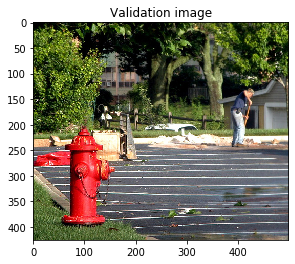

Original caption:  A red fire hydrant stands in a parking lot while a man holding the handle of a tool is in the distance.
Generated caption:  a red fire hydrant sitting on the side of a road.
BLEU_1: Cumulative 1-gram: 0.166667


In [27]:
caption, pred_caption, bleu_1 = get_val_prediction()